📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

📈 EUR_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.13828       0
2025-06-04 01:00:00+00:00  1.13668       0
2025-06-04 05:00:00+00:00  1.13995       0
2025-06-04 09:00:00+00:00  1.14096       0
2025-06-04 13:00:00+00:00  1.14330       0
2025-06-04 17:00:00+00:00  1.14180       0
2025-06-04 21:00:00+00:00  1.14292       0
2025-06-05 01:00:00+00:00  1.14104       0
2025-06-05 05:00:00+00:00  1.14130       0
2025-06-05 09:00:00+00:00  1.14177       0


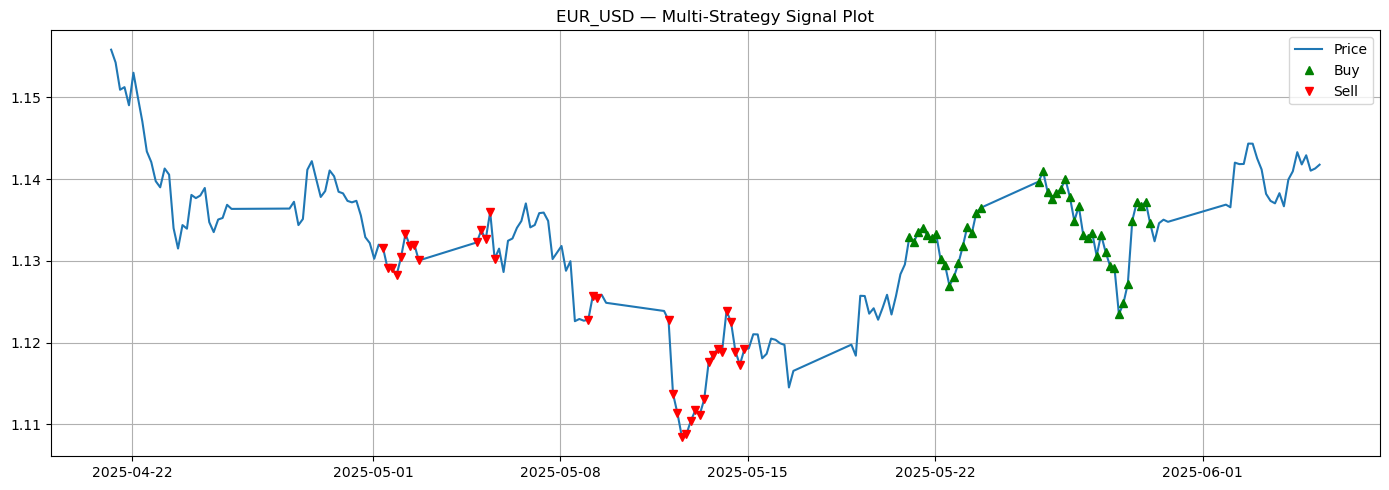

📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.

📈 GBP_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.35269       0
2025-06-04 01:00:00+00:00  1.35123       0
2025-06-04 05:00:00+00:00  1.35401       0
2025-06-04 09:00:00+00:00  1.35434       0
2025-06-04 13:00:00+00:00  1.35714       0
2025-06-04 17:00:00+00:00  1.35530       0
2025-06-04 21:00:00+00:00  1.35598       0
2025-06-05 01:00:00+00:00  1.35474       0
2025-06-05 05:00:00+00:00  1.35676       0
2025-06-05 09:00:00+00:00  1.35679       0


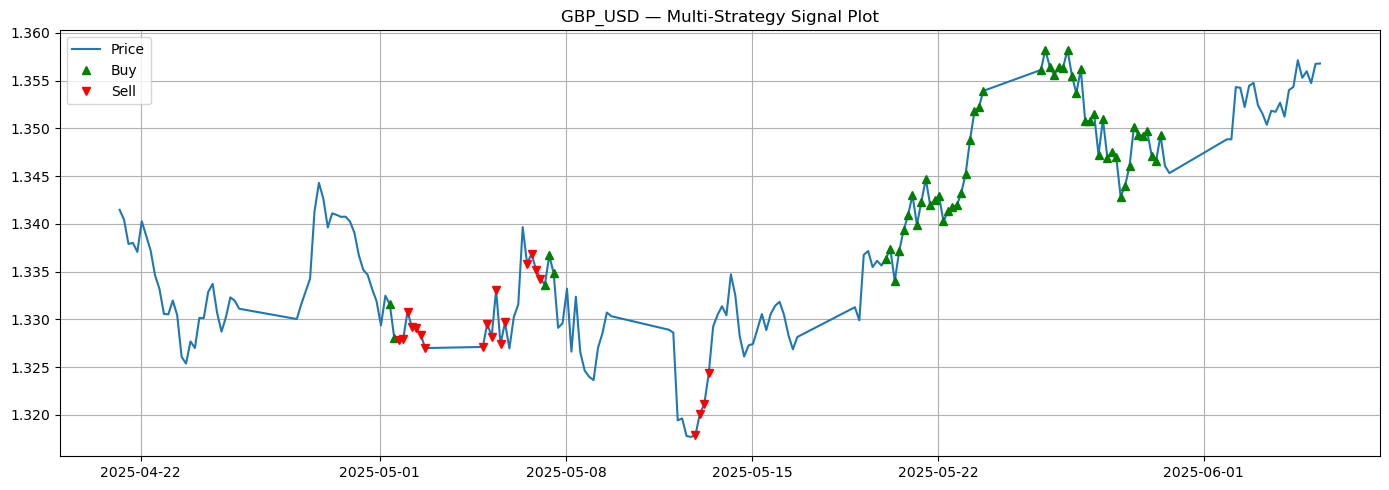

📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.

📈 AUD_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  0.64607       0
2025-06-04 01:00:00+00:00  0.64562       0
2025-06-04 05:00:00+00:00  0.64746       0
2025-06-04 09:00:00+00:00  0.64925       0
2025-06-04 13:00:00+00:00  0.65034       0
2025-06-04 17:00:00+00:00  0.64921       0
2025-06-04 21:00:00+00:00  0.65017       0
2025-06-05 01:00:00+00:00  0.64928       0
2025-06-05 05:00:00+00:00  0.65054       0
2025-06-05 09:00:00+00:00  0.65083       0


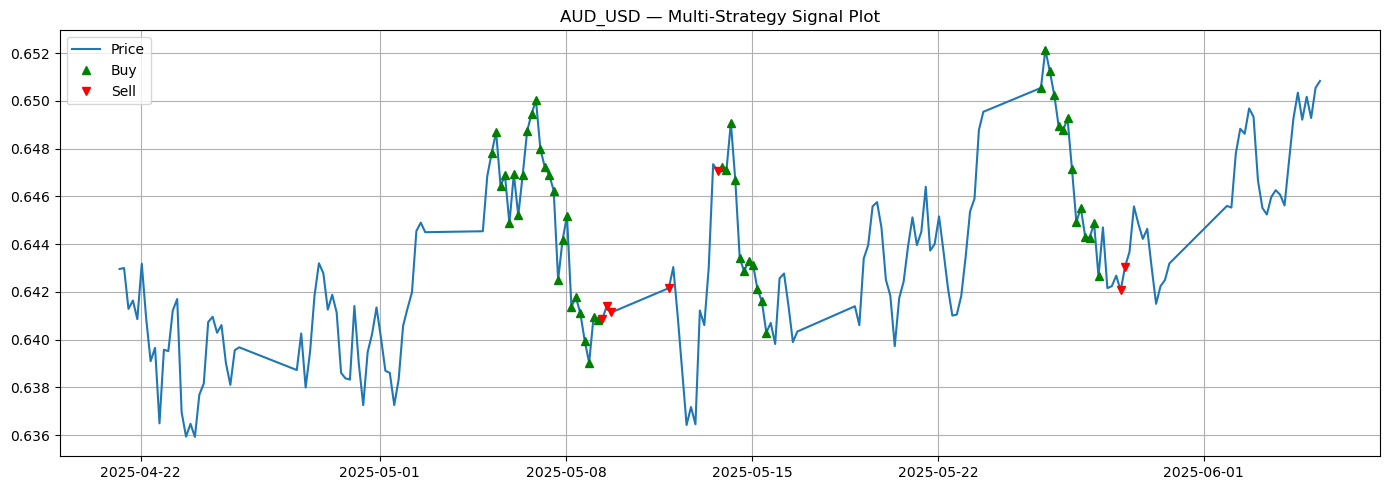

📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.

📈 USD_CAD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.37138      -1
2025-06-04 01:00:00+00:00  1.37226      -1
2025-06-04 05:00:00+00:00  1.37088      -1
2025-06-04 09:00:00+00:00  1.37000      -1
2025-06-04 13:00:00+00:00  1.36555      -1
2025-06-04 17:00:00+00:00  1.36794      -1
2025-06-04 21:00:00+00:00  1.36726      -1
2025-06-05 01:00:00+00:00  1.36787      -1
2025-06-05 05:00:00+00:00  1.36646      -1
2025-06-05 09:00:00+00:00  1.36638      -1


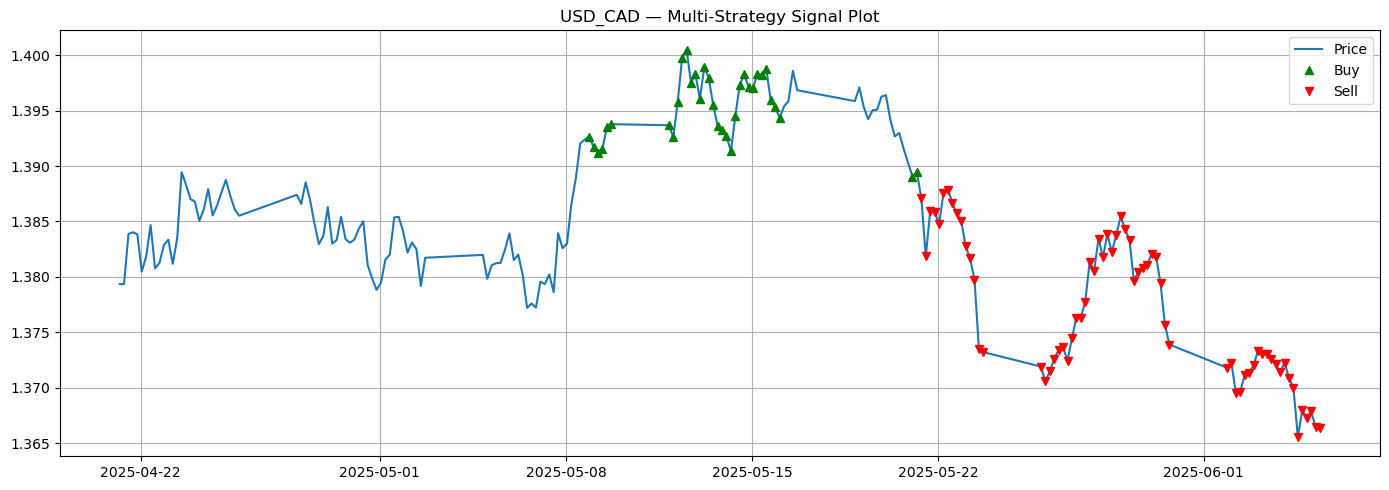

📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.

📈 USD_JPY Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  143.994       0
2025-06-04 01:00:00+00:00  144.257       0
2025-06-04 05:00:00+00:00  143.892       0
2025-06-04 09:00:00+00:00  143.556       0
2025-06-04 13:00:00+00:00  142.641       0
2025-06-04 17:00:00+00:00  142.766       0
2025-06-04 21:00:00+00:00  142.666       0
2025-06-05 01:00:00+00:00  143.033       0
2025-06-05 05:00:00+00:00  143.281       0
2025-06-05 09:00:00+00:00  143.234       0


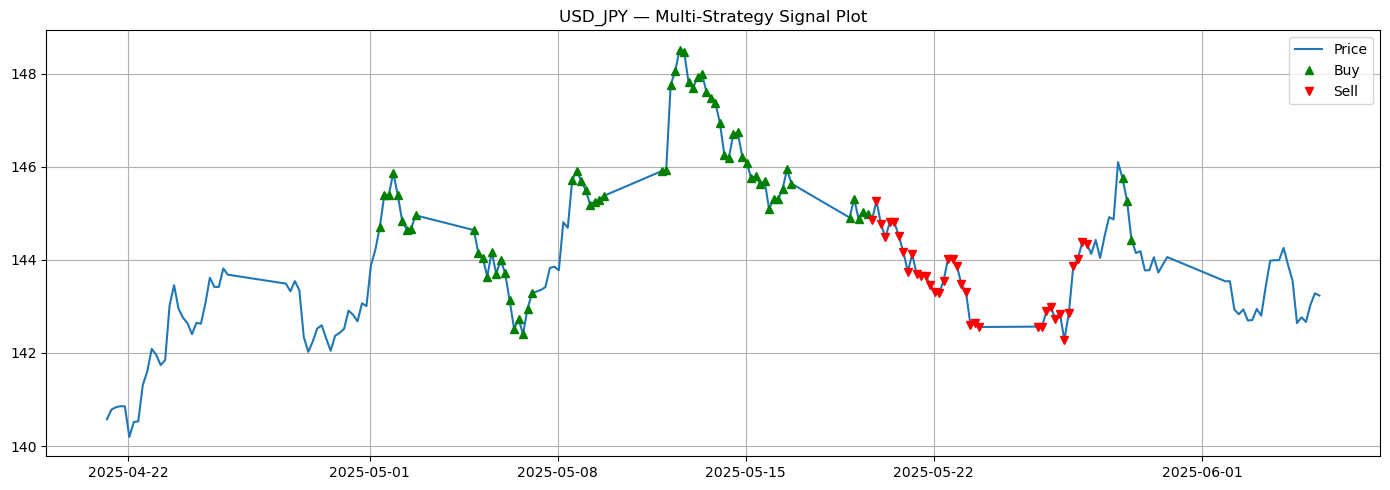

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "c"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
count = 200

# -------------------------------------
# Fetch OANDA Data for One Instrument
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={
        "granularity": granularity,
        "count": count,
        "price": "M"
    })
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic
# -------------------------------------
def trend_following_strategy(df):
    df['EMA20'] = ta.ema(df['Close'], length=20)
    df['EMA50'] = ta.ema(df['Close'], length=50)
    df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'])['ADX_14']
    df['Signal'] = 0
    df.loc[(df['EMA20'] > df['EMA50']) & (df['ADX'] > 20), 'Signal'] = 1
    df.loc[(df['EMA20'] < df['EMA50']) & (df['ADX'] > 20), 'Signal'] = -1
    return df

def mean_reversion_strategy(df):
    df['RSI'] = ta.rsi(df['Close'], length=14)
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    df.loc[df['RSI'] > 70, 'Signal'] = -1
    return df

def market_structure_strategy(df):
    df['HighShift'] = df['High'].shift(1)
    df['LowShift'] = df['Low'].shift(1)
    df['Signal'] = 0
    df.loc[(df['Close'] > df['HighShift']), 'Signal'] = 1
    df.loc[(df['Close'] < df['LowShift']), 'Signal'] = -1
    return df

# -------------------------------------
# Master Strategy Selector
# -------------------------------------
def choose_strategy(df):
    df['Signal'] = 0
    df = trend_following_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df = mean_reversion_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df = market_structure_strategy(df)
    return df

# -------------------------------------
# Run Full Scan on All Instruments
# -------------------------------------
def run():
    for symbol in instruments:
        df = fetch_data(symbol)
        if df is None or df.empty:
            continue

        df = choose_strategy(df)

        print(f"\n📈 {symbol} Signals:")
        print(df[['Close', 'Signal']].tail(10))

        # Plot signals
        plt.figure(figsize=(14, 5))
        plt.plot(df['Close'], label='Price')
        plt.plot(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], '^', color='green', label='Buy')
        plt.plot(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], 'v', color='red', label='Sell')
        plt.title(f"{symbol} — Multi-Strategy Signal Plot")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

# -------------------------------------
# Run
# -------------------------------------
if __name__ == "__main__":
    run()


📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

📈 EUR_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.13828       0
2025-06-04 01:00:00+00:00  1.13668       0
2025-06-04 05:00:00+00:00  1.13995       0
2025-06-04 09:00:00+00:00  1.14096       0
2025-06-04 13:00:00+00:00  1.14330       0
2025-06-04 17:00:00+00:00  1.14180       0
2025-06-04 21:00:00+00:00  1.14292       0
2025-06-05 01:00:00+00:00  1.14104       0
2025-06-05 05:00:00+00:00  1.14130       0
2025-06-05 09:00:00+00:00  1.14192       0


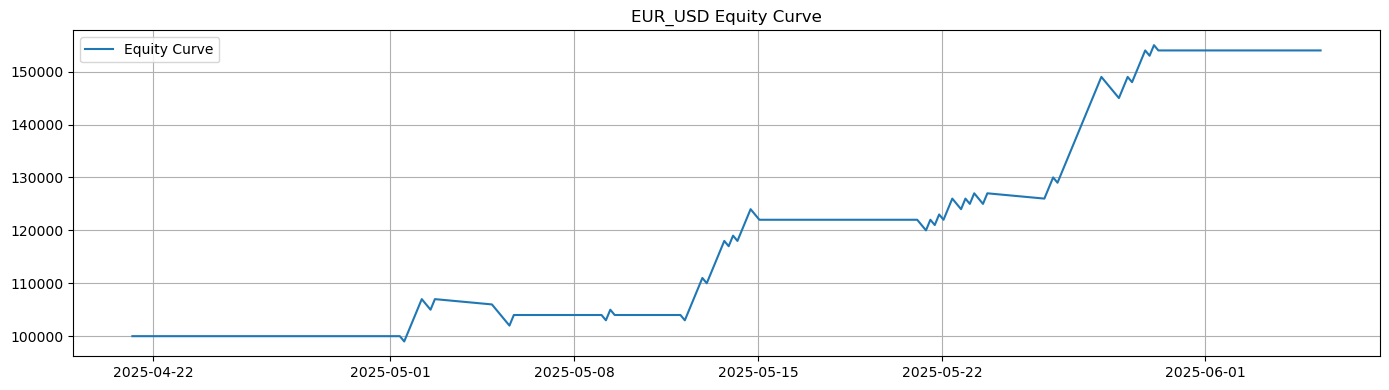

📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.

📈 GBP_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.35269       0
2025-06-04 01:00:00+00:00  1.35123       0
2025-06-04 05:00:00+00:00  1.35401       0
2025-06-04 09:00:00+00:00  1.35434       0
2025-06-04 13:00:00+00:00  1.35714       0
2025-06-04 17:00:00+00:00  1.35530       0
2025-06-04 21:00:00+00:00  1.35598       0
2025-06-05 01:00:00+00:00  1.35474       0
2025-06-05 05:00:00+00:00  1.35676       0
2025-06-05 09:00:00+00:00  1.35710       0


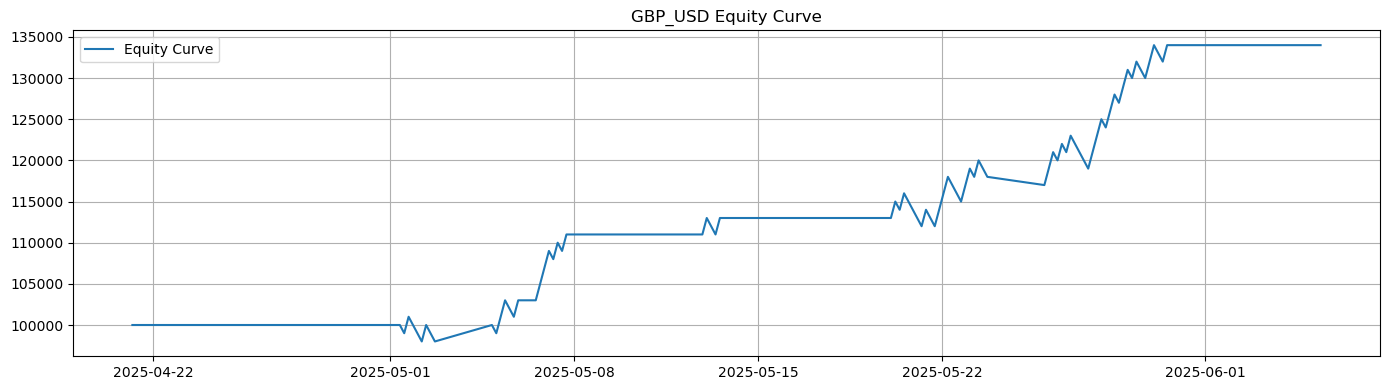

📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.

📈 AUD_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  0.64607       0
2025-06-04 01:00:00+00:00  0.64562       0
2025-06-04 05:00:00+00:00  0.64746       0
2025-06-04 09:00:00+00:00  0.64925       0
2025-06-04 13:00:00+00:00  0.65034       0
2025-06-04 17:00:00+00:00  0.64921       0
2025-06-04 21:00:00+00:00  0.65017       0
2025-06-05 01:00:00+00:00  0.64928       0
2025-06-05 05:00:00+00:00  0.65054       0
2025-06-05 09:00:00+00:00  0.65122       0


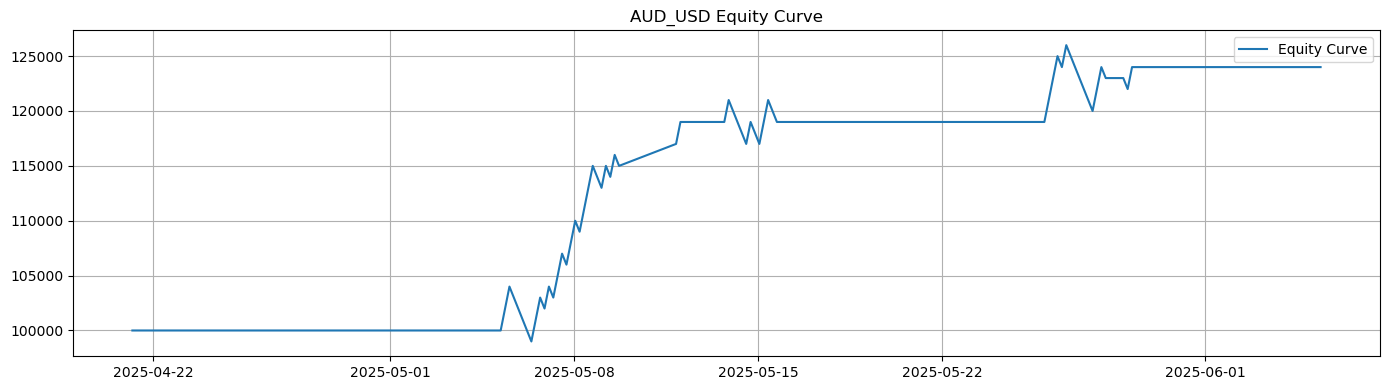

📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.

📈 USD_CAD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.37138      -1
2025-06-04 01:00:00+00:00  1.37226      -1
2025-06-04 05:00:00+00:00  1.37088      -1
2025-06-04 09:00:00+00:00  1.37000      -1
2025-06-04 13:00:00+00:00  1.36555      -1
2025-06-04 17:00:00+00:00  1.36794      -1
2025-06-04 21:00:00+00:00  1.36726      -1
2025-06-05 01:00:00+00:00  1.36787      -1
2025-06-05 05:00:00+00:00  1.36646      -1
2025-06-05 09:00:00+00:00  1.36600      -1


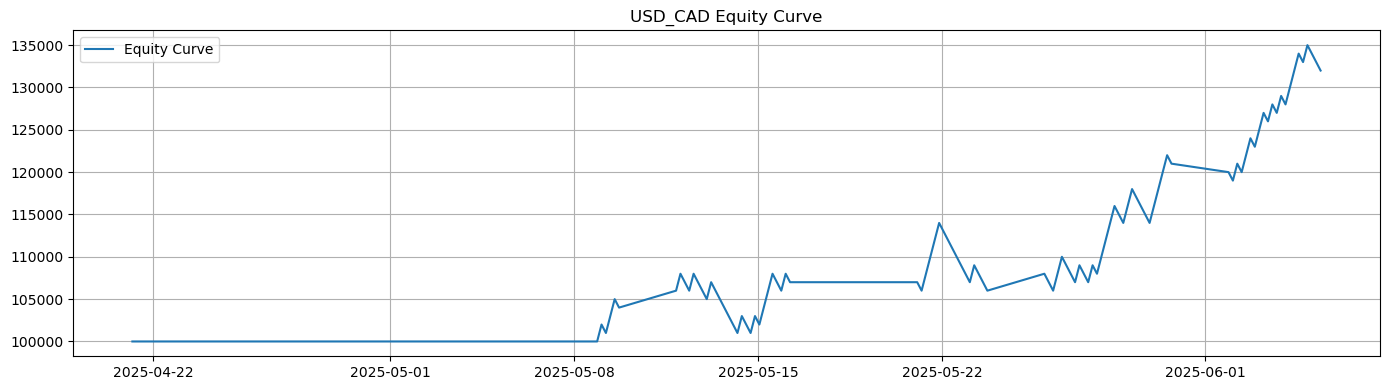

📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.

📈 USD_JPY Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  143.994       0
2025-06-04 01:00:00+00:00  144.257       0
2025-06-04 05:00:00+00:00  143.892       0
2025-06-04 09:00:00+00:00  143.556       0
2025-06-04 13:00:00+00:00  142.641       0
2025-06-04 17:00:00+00:00  142.766       0
2025-06-04 21:00:00+00:00  142.666       0
2025-06-05 01:00:00+00:00  143.033       0
2025-06-05 05:00:00+00:00  143.281       0
2025-06-05 09:00:00+00:00  143.181       0


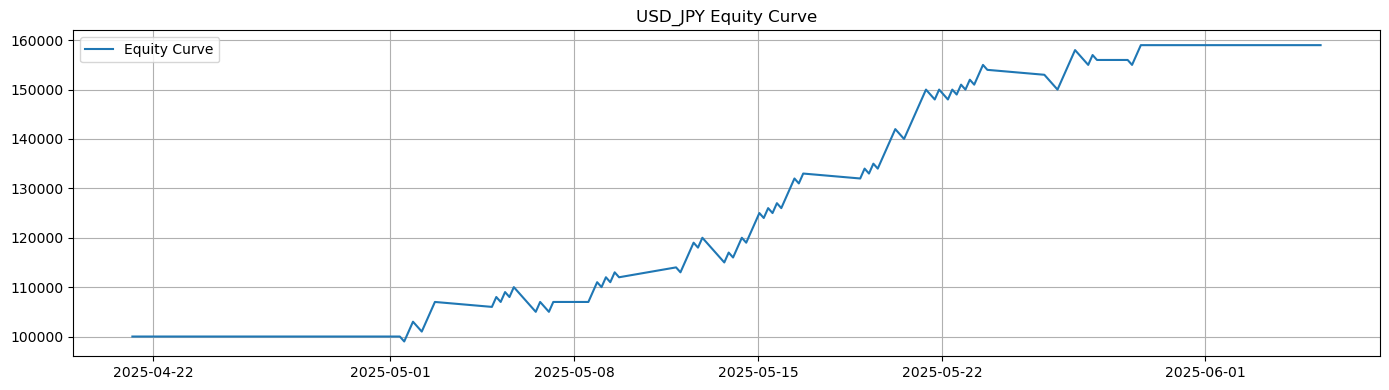


📊 Performance Summary:
Total Return: $203000.00
Win Rate: 49.52%
Avg Win: 2000.00
Avg Loss: -1000.00
Sharpe Ratio: 5.14
Max Drawdown: 3.00%


In [25]:
# multi_strategy_trader.py (Extended with FTMO-style Simulated Backtest)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"  # Replace with your real key or use dotenv
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
count = 200

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={
        "granularity": granularity,
        "count": count,
        "price": "M"
    })
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic
# -------------------------------------
def trend_following_strategy(df):
    df['EMA20'] = ta.ema(df['Close'], length=20)
    df['EMA50'] = ta.ema(df['Close'], length=50)
    df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'])['ADX_14']
    df['Signal'] = 0
    df.loc[(df['EMA20'] > df['EMA50']) & (df['ADX'] > 20), 'Signal'] = 1
    df.loc[(df['EMA20'] < df['EMA50']) & (df['ADX'] > 20), 'Signal'] = -1
    return df

def mean_reversion_strategy(df):
    df['RSI'] = ta.rsi(df['Close'], length=14)
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    df.loc[df['RSI'] > 70, 'Signal'] = -1
    return df

def market_structure_strategy(df):
    df['HighShift'] = df['High'].shift(1)
    df['LowShift'] = df['Low'].shift(1)
    df['Signal'] = 0
    df.loc[(df['Close'] > df['HighShift']), 'Signal'] = 1
    df.loc[(df['Close'] < df['LowShift']), 'Signal'] = -1
    return df

# -------------------------------------
# Master Strategy Selector
# -------------------------------------
def choose_strategy(df):
    df['Signal'] = 0
    df = trend_following_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df = mean_reversion_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df = market_structure_strategy(df)
    return df

# -------------------------------------
# Simulate Backtest with Fixed SL/TP
# -------------------------------------
def simulate_trades(df, initial_equity=100_000, risk_per_trade=0.01):
    equity = initial_equity
    balance_curve = [equity]
    trade_log = []
    risk_amount = initial_equity * risk_per_trade
    sl_pct = 0.01
    tp_pct = 0.02

    for i in range(1, len(df)):
        signal = df['Signal'].iloc[i - 1]
        price = df['Close'].iloc[i]

        if signal == 0:
            balance_curve.append(equity)
            continue

        sl = price * sl_pct
        tp = price * tp_pct

        # Simulated win/loss outcome (can later use candle range logic)
        outcome = np.random.choice(["win", "loss"], p=[0.55, 0.45])
        pnl = tp * (risk_amount / sl) if outcome == "win" else -risk_amount
        equity += pnl
        trade_log.append(pnl)
        balance_curve.append(equity)

    df['Equity'] = balance_curve
    return df, trade_log

# -------------------------------------
# Analyze Performance Metrics
# -------------------------------------
def analyze_performance(trade_log, initial_equity=100_000):
    trade_log = np.array(trade_log)
    total_return = np.sum(trade_log)
    win_rate = np.mean(trade_log > 0)
    avg_win = np.mean(trade_log[trade_log > 0]) if any(trade_log > 0) else 0
    avg_loss = np.mean(trade_log[trade_log < 0]) if any(trade_log < 0) else 0
    sharpe = np.mean(trade_log) / (np.std(trade_log) + 1e-9) * np.sqrt(252)
    drawdown = np.maximum.accumulate(trade_log).clip(min=0) - trade_log
    max_dd = (np.max(drawdown) / initial_equity) * 100

    print(f"\n📊 Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate*100:.2f}%")
    print(f"Avg Win: {avg_win:.2f}")
    print(f"Avg Loss: {avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd:.2f}%")

# -------------------------------------
# Main Execution Loop
# -------------------------------------
def run():
    all_trades = []
    for symbol in instruments:
        df = fetch_data(symbol)
        if df is None or df.empty:
            continue
        df = choose_strategy(df)
        df, trade_log = simulate_trades(df)
        all_trades.extend(trade_log)

        print(f"\n📈 {symbol} Signals:")
        print(df[['Close', 'Signal']].tail(10))

        plt.figure(figsize=(14, 4))
        plt.plot(df['Equity'], label='Equity Curve')
        plt.title(f"{symbol} Equity Curve")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

    analyze_performance(all_trades)

# -------------------------------------
if __name__ == "__main__":
    run()


📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

📈 EUR_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.13828       0
2025-06-04 01:00:00+00:00  1.13668       0
2025-06-04 05:00:00+00:00  1.13995       0
2025-06-04 09:00:00+00:00  1.14096       0
2025-06-04 13:00:00+00:00  1.14330       0
2025-06-04 17:00:00+00:00  1.14180       0
2025-06-04 21:00:00+00:00  1.14292       0
2025-06-05 01:00:00+00:00  1.14104       0
2025-06-05 05:00:00+00:00  1.14130       0
2025-06-05 09:00:00+00:00  1.14133       0
EUR_USD Signal Count: Signal
 0    122
 1     43
-1     35
Name: count, dtype: int64


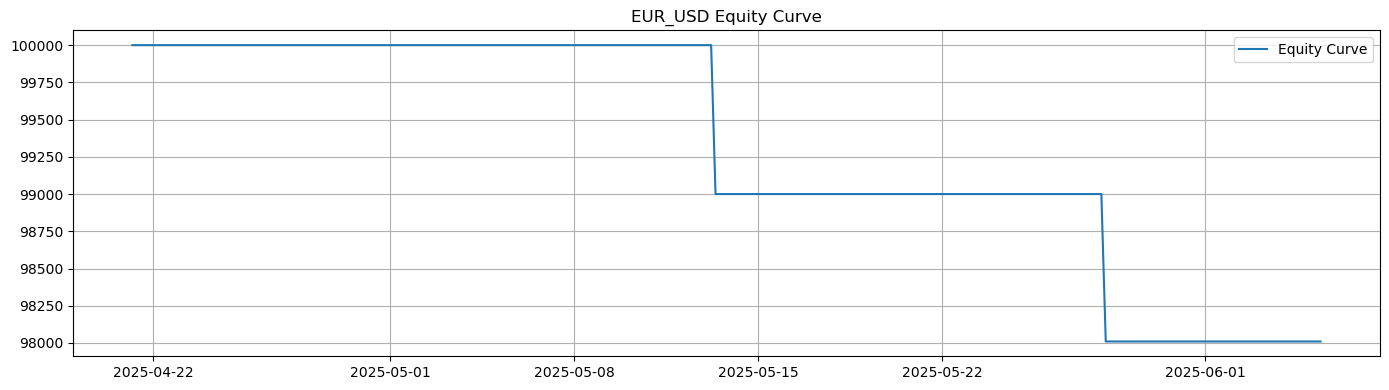

📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.

📈 GBP_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.35269       0
2025-06-04 01:00:00+00:00  1.35123       0
2025-06-04 05:00:00+00:00  1.35401       0
2025-06-04 09:00:00+00:00  1.35434       0
2025-06-04 13:00:00+00:00  1.35714       0
2025-06-04 17:00:00+00:00  1.35530       0
2025-06-04 21:00:00+00:00  1.35598       0
2025-06-05 01:00:00+00:00  1.35474       0
2025-06-05 05:00:00+00:00  1.35676       0
2025-06-05 09:00:00+00:00  1.35617       0
GBP_USD Signal Count: Signal
 0    123
 1     56
-1     21
Name: count, dtype: int64


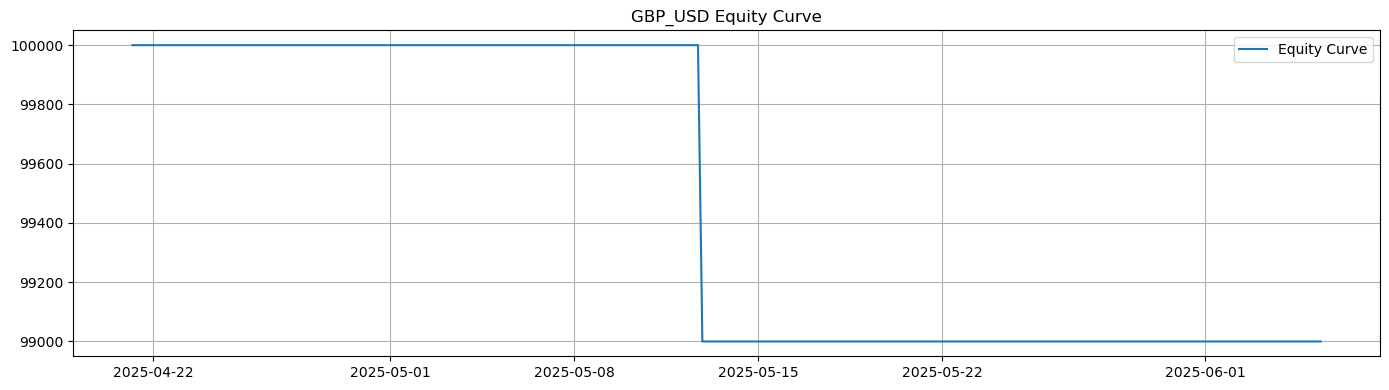

📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.

📈 AUD_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  0.64607       0
2025-06-04 01:00:00+00:00  0.64562       0
2025-06-04 05:00:00+00:00  0.64746       0
2025-06-04 09:00:00+00:00  0.64925       0
2025-06-04 13:00:00+00:00  0.65034       0
2025-06-04 17:00:00+00:00  0.64921       0
2025-06-04 21:00:00+00:00  0.65017       0
2025-06-05 01:00:00+00:00  0.64928       0
2025-06-05 05:00:00+00:00  0.65054       0
2025-06-05 09:00:00+00:00  0.65118       0
AUD_USD Signal Count: Signal
 0    143
 1     50
-1      7
Name: count, dtype: int64


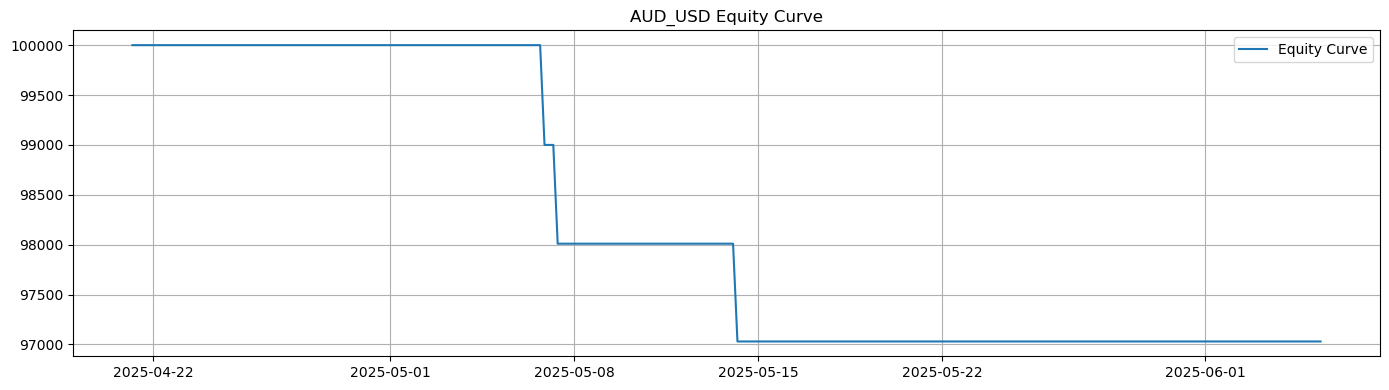

📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.

📈 USD_CAD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.37138      -1
2025-06-04 01:00:00+00:00  1.37226      -1
2025-06-04 05:00:00+00:00  1.37088      -1
2025-06-04 09:00:00+00:00  1.37000      -1
2025-06-04 13:00:00+00:00  1.36555      -1
2025-06-04 17:00:00+00:00  1.36794      -1
2025-06-04 21:00:00+00:00  1.36726      -1
2025-06-05 01:00:00+00:00  1.36787      -1
2025-06-05 05:00:00+00:00  1.36646      -1
2025-06-05 09:00:00+00:00  1.36617      -1
USD_CAD Signal Count: Signal
 0    99
-1    67
 1    34
Name: count, dtype: int64


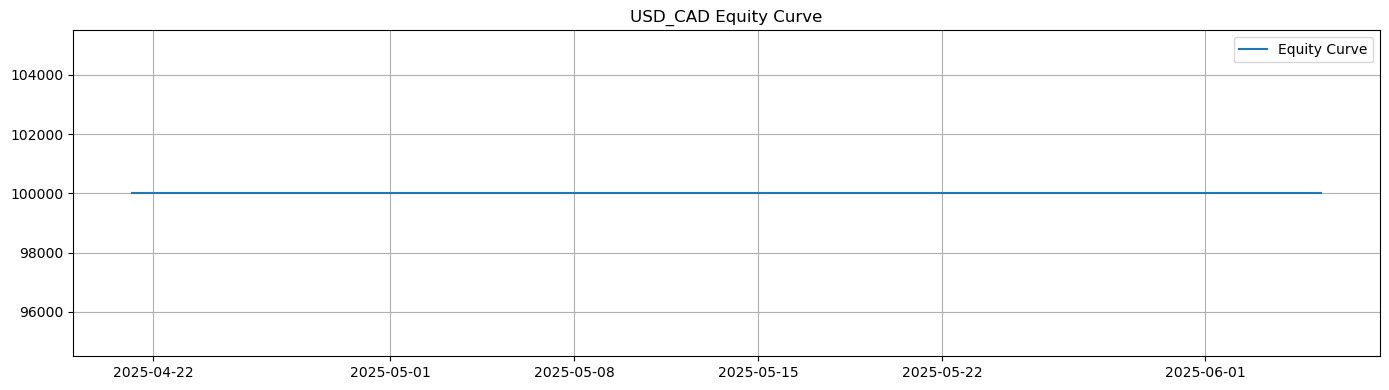

📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.

📈 USD_JPY Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  143.994       0
2025-06-04 01:00:00+00:00  144.257       0
2025-06-04 05:00:00+00:00  143.892       0
2025-06-04 09:00:00+00:00  143.556       0
2025-06-04 13:00:00+00:00  142.641       0
2025-06-04 17:00:00+00:00  142.766       0
2025-06-04 21:00:00+00:00  142.666       0
2025-06-05 01:00:00+00:00  143.033       0
2025-06-05 05:00:00+00:00  143.281       0
2025-06-05 09:00:00+00:00  143.228       0
USD_JPY Signal Count: Signal
 0    94
 1    69
-1    37
Name: count, dtype: int64


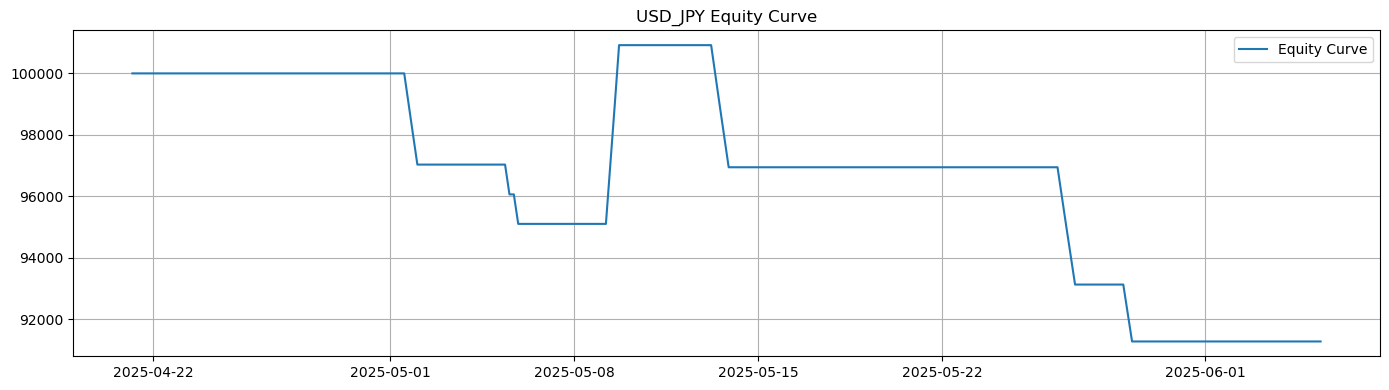


📊 Performance Summary:
Total Return: $-14690.02
Win Rate: 12.50%
Avg Win: $1940.27
Avg Loss: $-976.71
Sharpe Ratio: -10.07
Max Drawdown: 13.69%


In [35]:
# multi_strategy_trader.py - Fully Fixed Version (Robust Signal + Multi-Candle SL/TP)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
count = 200

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={
        "granularity": granularity,
        "count": count,
        "price": "M"
    })
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic
# -------------------------------------
def trend_following_strategy(df):
    df['EMA20'] = ta.ema(df['Close'], length=20)
    df['EMA50'] = ta.ema(df['Close'], length=50)
    df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'])['ADX_14']
    df['Signal'] = 0
    df.loc[(df['EMA20'] > df['EMA50']) & (df['ADX'] > 20), 'Signal'] = 1
    df.loc[(df['EMA20'] < df['EMA50']) & (df['ADX'] > 20), 'Signal'] = -1
    return df

def mean_reversion_strategy(df):
    df['RSI'] = ta.rsi(df['Close'], length=14)
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    df.loc[df['RSI'] > 70, 'Signal'] = -1
    return df

def market_structure_strategy(df):
    df['HighShift'] = df['High'].shift(1)
    df['LowShift'] = df['Low'].shift(1)
    df['Signal'] = 0
    df.loc[(df['Close'] > df['HighShift']), 'Signal'] = 1
    df.loc[(df['Close'] < df['LowShift']), 'Signal'] = -1
    return df

def choose_strategy(df):
    df['Signal'] = 0
    df = trend_following_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df = mean_reversion_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df = market_structure_strategy(df)
    return df

# -------------------------------------
# Simulate Trades with Real SL/TP (Multi-Candle Support)
# -------------------------------------
def simulate_trades(df, initial_equity=100_000, risk_per_trade=0.01, lookback=5):
    equity = initial_equity
    balance_curve = [equity]
    trade_log = []

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            balance_curve.append(equity)
            continue

        sl_pct = 0.01
        tp_pct = 0.02
        risk_amount = equity * risk_per_trade
        sl_price = entry_price * (1 - sl_pct) if signal == 1 else entry_price * (1 + sl_pct)
        tp_price = entry_price * (1 + tp_pct) if signal == 1 else entry_price * (1 - tp_pct)

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:
                if low_next <= sl_price:
                    pnl = -risk_amount
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * risk_amount
                    pnl = reward
                    exit_found = True
                    break
            else:
                if high_next >= sl_price:
                    pnl = -risk_amount
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * risk_amount
                    pnl = reward
                    exit_found = True
                    break

        equity += pnl
        balance_curve.append(equity)
        if exit_found:
            trade_log.append(pnl)

    # Pad equity curve if shorter than DataFrame
    while len(balance_curve) < len(df):
        balance_curve.append(balance_curve[-1])

    df['Equity'] = balance_curve
    return df, trade_log

# -------------------------------------
# Analyze Performance (Safe Handling of Empty Logs)
# -------------------------------------
def analyze_performance(trade_log, initial_equity=100_000):
    trade_log = np.array(trade_log)

    if len(trade_log) == 0:
        print("⚠️ No trades recorded. Cannot compute performance.")
        return

    total_return = np.sum(trade_log)
    win_rate = np.mean(trade_log > 0) if len(trade_log) > 0 else 0
    avg_win = np.mean(trade_log[trade_log > 0]) if any(trade_log > 0) else 0
    avg_loss = np.mean(trade_log[trade_log < 0]) if any(trade_log < 0) else 0
    sharpe = np.mean(trade_log) / (np.std(trade_log) + 1e-9) * np.sqrt(252)

    cum_returns = np.cumsum(trade_log)
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = (np.max(drawdowns) / initial_equity) * 100 if len(drawdowns) > 0 else 0

    print(f"\n📊 Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate*100:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd:.2f}%")

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    all_trades = []
    for symbol in instruments:
        df = fetch_data(symbol)
        if df is None or df.empty:
            print(f"🚫 Skipping {symbol}, invalid or empty data.")
            continue
        df = choose_strategy(df)
        df, trade_log = simulate_trades(df)
        all_trades.extend(trade_log)

        print(f"\n📈 {symbol} Signals:")
        print(df[['Close', 'Signal']].tail(10))
        print(f"{symbol} Signal Count:", df['Signal'].value_counts())

        plt.figure(figsize=(14, 4))
        plt.plot(df['Equity'], label='Equity Curve')
        plt.title(f"{symbol} Equity Curve")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

    analyze_performance(all_trades)

# -------------------------------------
if __name__ == "__main__":
    run()

📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

📈 EUR_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.13828       0
2025-06-04 01:00:00+00:00  1.13668       0
2025-06-04 05:00:00+00:00  1.13995       0
2025-06-04 09:00:00+00:00  1.14096       0
2025-06-04 13:00:00+00:00  1.14330       0
2025-06-04 17:00:00+00:00  1.14180       0
2025-06-04 21:00:00+00:00  1.14292       0
2025-06-05 01:00:00+00:00  1.14104       0
2025-06-05 05:00:00+00:00  1.14130       0
2025-06-05 09:00:00+00:00  1.14183       0
EUR_USD Signal Count:
 Signal
 0    122
 1     43
-1     35
Name: count, dtype: int64


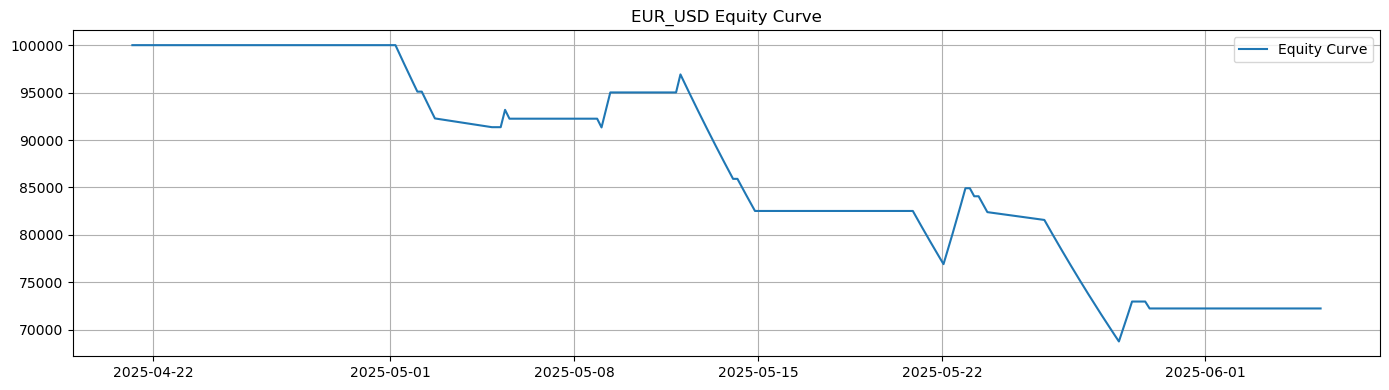

📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.

📈 GBP_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.35269       0
2025-06-04 01:00:00+00:00  1.35123       0
2025-06-04 05:00:00+00:00  1.35401       0
2025-06-04 09:00:00+00:00  1.35434       0
2025-06-04 13:00:00+00:00  1.35714       0
2025-06-04 17:00:00+00:00  1.35530       0
2025-06-04 21:00:00+00:00  1.35598       0
2025-06-05 01:00:00+00:00  1.35474       0
2025-06-05 05:00:00+00:00  1.35676       0
2025-06-05 09:00:00+00:00  1.35648       0
GBP_USD Signal Count:
 Signal
 0    123
 1     56
-1     21
Name: count, dtype: int64


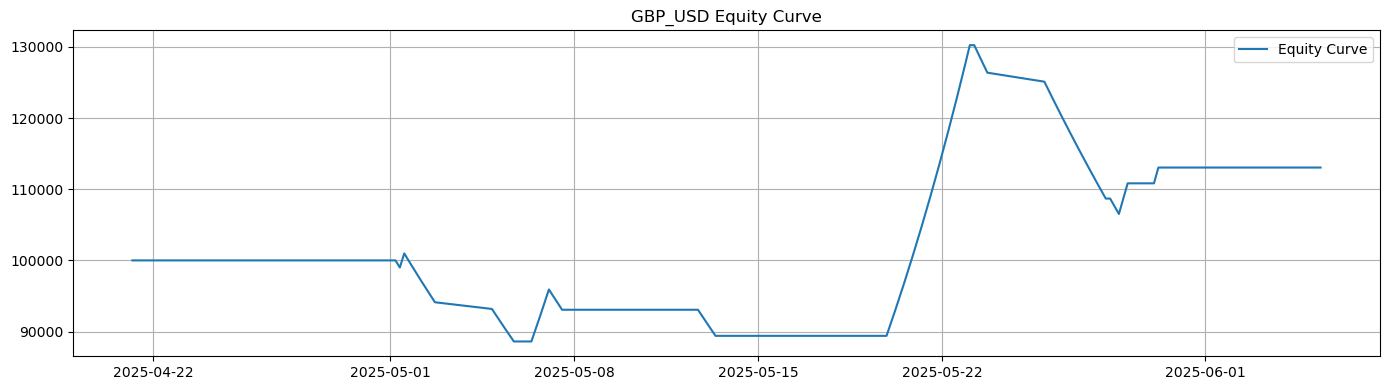

📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.

📈 AUD_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  0.64607       0
2025-06-04 01:00:00+00:00  0.64562       0
2025-06-04 05:00:00+00:00  0.64746       0
2025-06-04 09:00:00+00:00  0.64925       0
2025-06-04 13:00:00+00:00  0.65034       0
2025-06-04 17:00:00+00:00  0.64921       0
2025-06-04 21:00:00+00:00  0.65017       0
2025-06-05 01:00:00+00:00  0.64928       0
2025-06-05 05:00:00+00:00  0.65054       0
2025-06-05 09:00:00+00:00  0.65101       0
AUD_USD Signal Count:
 Signal
 0    143
 1     50
-1      7
Name: count, dtype: int64


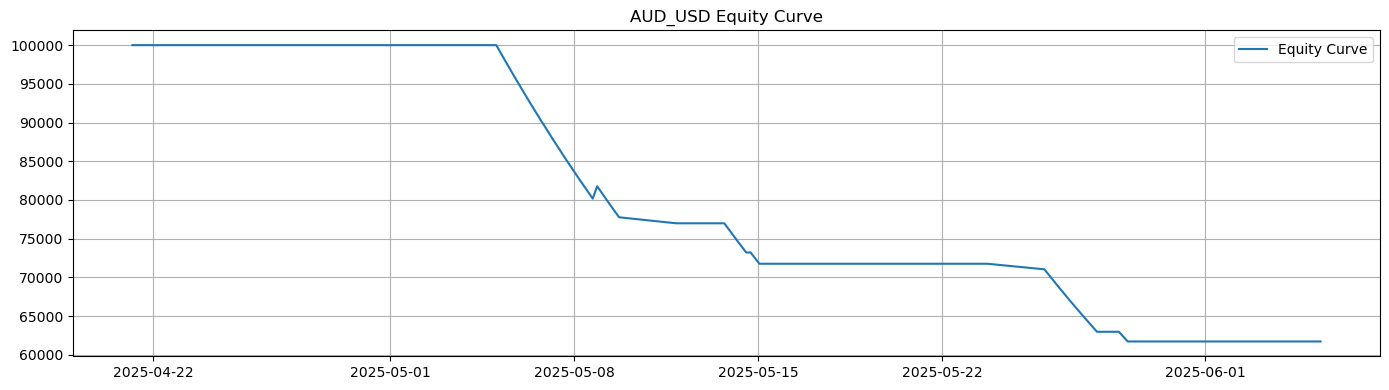

📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.

📈 USD_CAD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.37138      -1
2025-06-04 01:00:00+00:00  1.37226      -1
2025-06-04 05:00:00+00:00  1.37088      -1
2025-06-04 09:00:00+00:00  1.37000      -1
2025-06-04 13:00:00+00:00  1.36555      -1
2025-06-04 17:00:00+00:00  1.36794      -1
2025-06-04 21:00:00+00:00  1.36726      -1
2025-06-05 01:00:00+00:00  1.36787      -1
2025-06-05 05:00:00+00:00  1.36646      -1
2025-06-05 09:00:00+00:00  1.36582      -1
USD_CAD Signal Count:
 Signal
 0    99
-1    67
 1    34
Name: count, dtype: int64


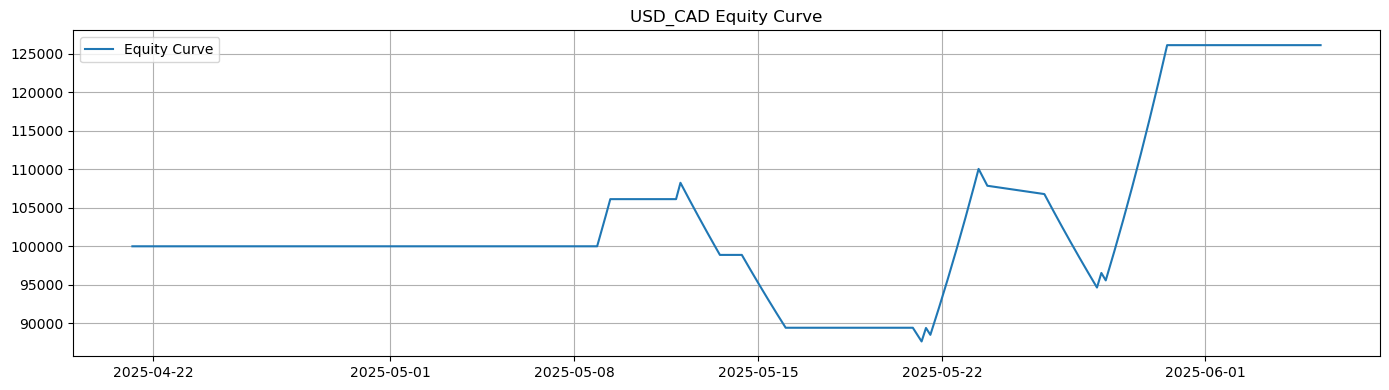

📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.

📈 USD_JPY Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  143.994       0
2025-06-04 01:00:00+00:00  144.257       0
2025-06-04 05:00:00+00:00  143.892       0
2025-06-04 09:00:00+00:00  143.556       0
2025-06-04 13:00:00+00:00  142.641       0
2025-06-04 17:00:00+00:00  142.766       0
2025-06-04 21:00:00+00:00  142.666       0
2025-06-05 01:00:00+00:00  143.033       0
2025-06-05 05:00:00+00:00  143.281       0
2025-06-05 09:00:00+00:00  143.220       0
USD_JPY Signal Count:
 Signal
 0    94
 1    69
-1    37
Name: count, dtype: int64


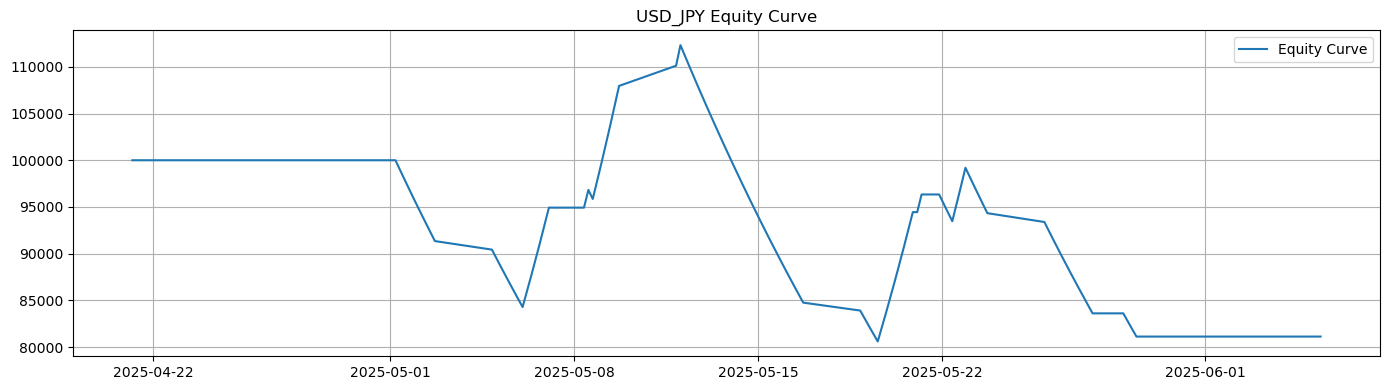


📊 Performance Summary:
Total Return: $-45762.98
Win Rate: 27.45%
Avg Win: $1962.02
Avg Loss: $-919.08
Sharpe Ratio: -1.57
Max Drawdown: 67.84%

🧾 Trade Log:
 Symbol                Entry Time                 Exit Time  Entry Price  Exit Price  Signal          PnL Strategy
EUR_USD 2025-05-01 09:00:00+00:00 2025-05-02 13:00:00+00:00      1.13152     1.13199      -1 -1000.000000    Trend
EUR_USD 2025-05-01 13:00:00+00:00 2025-05-02 09:00:00+00:00      1.12908     1.13188      -1  -990.000000    Trend
EUR_USD 2025-05-01 17:00:00+00:00 2025-05-02 09:00:00+00:00      1.12910     1.13188      -1  -980.100000    Trend
EUR_USD 2025-05-01 21:00:00+00:00 2025-05-02 05:00:00+00:00      1.12822     1.13328      -1  -970.299000    Trend
EUR_USD 2025-05-02 01:00:00+00:00 2025-05-02 13:00:00+00:00      1.13042     1.13199      -1  -960.596010    Trend
EUR_USD 2025-05-02 09:00:00+00:00 2025-05-02 13:00:00+00:00      1.13188     1.13199      -1  -950.990050    Trend
EUR_USD 2025-05-02 13:00:00+00:00 202

In [37]:
# multi_strategy_trader.py - With ATR Stops + Trade Logging + Strategy Attribution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
count = 200
lookback = 20  # Increased lookback window

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={
        "granularity": granularity,
        "count": count,
        "price": "M"
    })
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic
# -------------------------------------
def trend_following_strategy(df):
    df['EMA20'] = ta.ema(df['Close'], length=20)
    df['EMA50'] = ta.ema(df['Close'], length=50)
    df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'])['ADX_14']
    df['Signal'] = 0
    df.loc[(df['EMA20'] > df['EMA50']) & (df['ADX'] > 20), 'Signal'] = 1
    df.loc[(df['EMA20'] < df['EMA50']) & (df['ADX'] > 20), 'Signal'] = -1
    return df, 'Trend'

def mean_reversion_strategy(df):
    df['RSI'] = ta.rsi(df['Close'], length=14)
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    df.loc[df['RSI'] > 70, 'Signal'] = -1
    return df, 'MeanReversion'

def market_structure_strategy(df):
    df['HighShift'] = df['High'].shift(1)
    df['LowShift'] = df['Low'].shift(1)
    df['Signal'] = 0
    df.loc[(df['Close'] > df['HighShift']), 'Signal'] = 1
    df.loc[(df['Close'] < df['LowShift']), 'Signal'] = -1
    return df, 'MarketStructure'

def choose_strategy(df):
    df['Signal'] = 0
    df, strat = trend_following_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df, strat = mean_reversion_strategy(df)
    if df['Signal'].abs().sum() == 0:
        df, strat = market_structure_strategy(df)
    df['Strategy'] = strat
    return df

# -------------------------------------
# Simulate Trades with Real ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, symbol, initial_equity=100_000, risk_per_trade=0.01, lookback=20):
    equity = initial_equity
    balance_curve = [equity]
    trade_log = []

    df = df.copy()
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            balance_curve.append(equity)
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:
                if low_next <= sl_price:
                    pnl = -risk_per_trade * equity
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * risk_per_trade * equity
                    pnl = reward
                    exit_found = True
                    break
            else:
                if high_next >= sl_price:
                    pnl = -risk_per_trade * equity
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * risk_per_trade * equity
                    pnl = reward
                    exit_found = True
                    break

        equity += pnl
        balance_curve.append(equity)
        if exit_found:
            trade_log.append({
                'Symbol': symbol,
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl,
                'Strategy': df['Strategy'].iloc[i]
            })

    while len(balance_curve) < len(df):
        balance_curve.append(balance_curve[-1])

    df['Equity'] = balance_curve
    return df, trade_log

# -------------------------------------
# Analyze Performance (Safe Handling of Empty Logs)
# -------------------------------------
def analyze_performance(trade_log, initial_equity=100_000):
    trade_log = pd.DataFrame(trade_log)

    if trade_log.empty:
        print("⚠️ No trades recorded. Cannot compute performance.")
        return

    total_return = trade_log['PnL'].sum()
    win_rate = (trade_log['PnL'] > 0).mean() * 100
    avg_win = trade_log[trade_log['PnL'] > 0]['PnL'].mean()
    avg_loss = trade_log[trade_log['PnL'] < 0]['PnL'].mean()
    sharpe = trade_log['PnL'].mean() / (trade_log['PnL'].std() + 1e-9) * np.sqrt(252)
    cum_returns = trade_log['PnL'].cumsum()
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = (drawdowns.max() / initial_equity) * 100

    print("\n📊 Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd:.2f}%")

    print("\n🧾 Trade Log:")
    print(trade_log.head(20).to_string(index=False))

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    all_trades = []
    for symbol in instruments:
        df = fetch_data(symbol)
        if df is None or df.empty:
            print(f"🚫 Skipping {symbol}, invalid or empty data.")
            continue
        df = choose_strategy(df)
        df, trade_log = simulate_trades(df, symbol=symbol, lookback=lookback)
        all_trades.extend(trade_log)

        print(f"\n📈 {symbol} Signals:")
        print(df[['Close', 'Signal']].tail(10))
        print(f"{symbol} Signal Count:\n", df['Signal'].value_counts())

        plt.figure(figsize=(14, 4))
        plt.plot(df['Equity'], label='Equity Curve')
        plt.title(f"{symbol} Equity Curve")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

    analyze_performance(all_trades)

# -------------------------------------
if __name__ == "__main__":
    run()

📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

📈 EUR_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.13828       1
2025-06-04 01:00:00+00:00  1.13668      -1
2025-06-04 05:00:00+00:00  1.13995       1
2025-06-04 09:00:00+00:00  1.14096       1
2025-06-04 13:00:00+00:00  1.14330       1
2025-06-04 17:00:00+00:00  1.14180       0
2025-06-04 21:00:00+00:00  1.14292       0
2025-06-05 01:00:00+00:00  1.14104      -1
2025-06-05 05:00:00+00:00  1.14130       0
2025-06-05 09:00:00+00:00  1.14272       1
EUR_USD Signal Count:
 Signal
 0    71
 1    70
-1    59
Name: count, dtype: int64
EUR_USD Strategy Count:
 Strategy
Trend              78
None               71
MarketStructure    46
MeanReversion       5
Name: count, dtype: int64


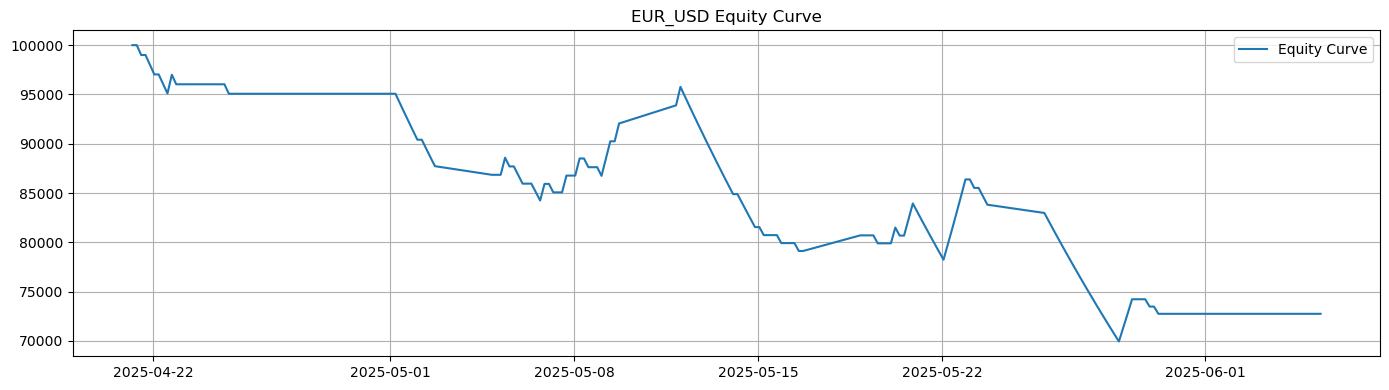

📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.

📈 GBP_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.35269       0
2025-06-04 01:00:00+00:00  1.35123      -1
2025-06-04 05:00:00+00:00  1.35401       0
2025-06-04 09:00:00+00:00  1.35434       0
2025-06-04 13:00:00+00:00  1.35714       1
2025-06-04 17:00:00+00:00  1.35530       0
2025-06-04 21:00:00+00:00  1.35598       0
2025-06-05 01:00:00+00:00  1.35474       0
2025-06-05 05:00:00+00:00  1.35676       1
2025-06-05 09:00:00+00:00  1.35815       1
GBP_USD Signal Count:
 Signal
 1    91
 0    61
-1    48
Name: count, dtype: int64
GBP_USD Strategy Count:
 Strategy
Trend              77
None               61
MarketStructure    58
MeanReversion       4
Name: count, dtype: int64


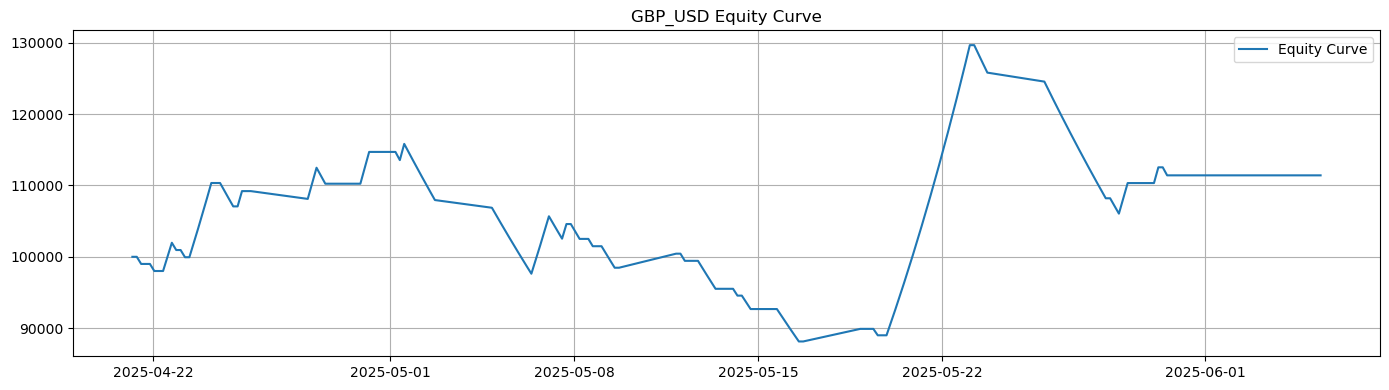

📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.

📈 AUD_USD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  0.64607       0
2025-06-04 01:00:00+00:00  0.64562      -1
2025-06-04 05:00:00+00:00  0.64746       0
2025-06-04 09:00:00+00:00  0.64925       1
2025-06-04 13:00:00+00:00  0.65034       1
2025-06-04 17:00:00+00:00  0.64921       0
2025-06-04 21:00:00+00:00  0.65017       0
2025-06-05 01:00:00+00:00  0.64928       0
2025-06-05 05:00:00+00:00  0.65054       0
2025-06-05 09:00:00+00:00  0.65138       1
AUD_USD Signal Count:
 Signal
 1    89
 0    73
-1    38
Name: count, dtype: int64
AUD_USD Strategy Count:
 Strategy
None               73
MarketStructure    70
Trend              57
Name: count, dtype: int64


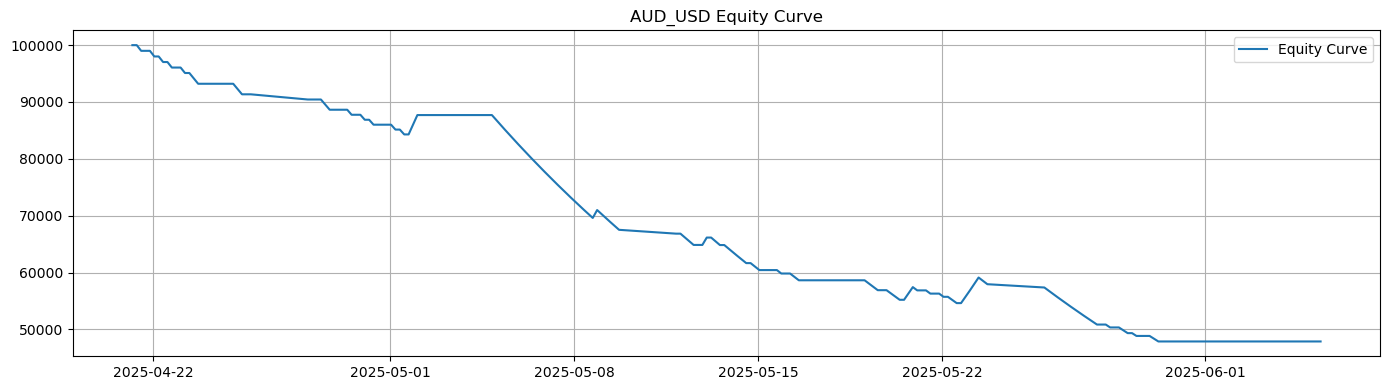

📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.

📈 USD_CAD Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  1.37138      -1
2025-06-04 01:00:00+00:00  1.37226      -1
2025-06-04 05:00:00+00:00  1.37088      -1
2025-06-04 09:00:00+00:00  1.37000      -1
2025-06-04 13:00:00+00:00  1.36555      -1
2025-06-04 17:00:00+00:00  1.36794      -1
2025-06-04 21:00:00+00:00  1.36726      -1
2025-06-05 01:00:00+00:00  1.36787      -1
2025-06-05 05:00:00+00:00  1.36646      -1
2025-06-05 09:00:00+00:00  1.36544      -1
USD_CAD Signal Count:
 Signal
-1    89
 0    60
 1    51
Name: count, dtype: int64
USD_CAD Strategy Count:
 Strategy
Trend              101
None                60
MarketStructure     38
MeanReversion        1
Name: count, dtype: int64


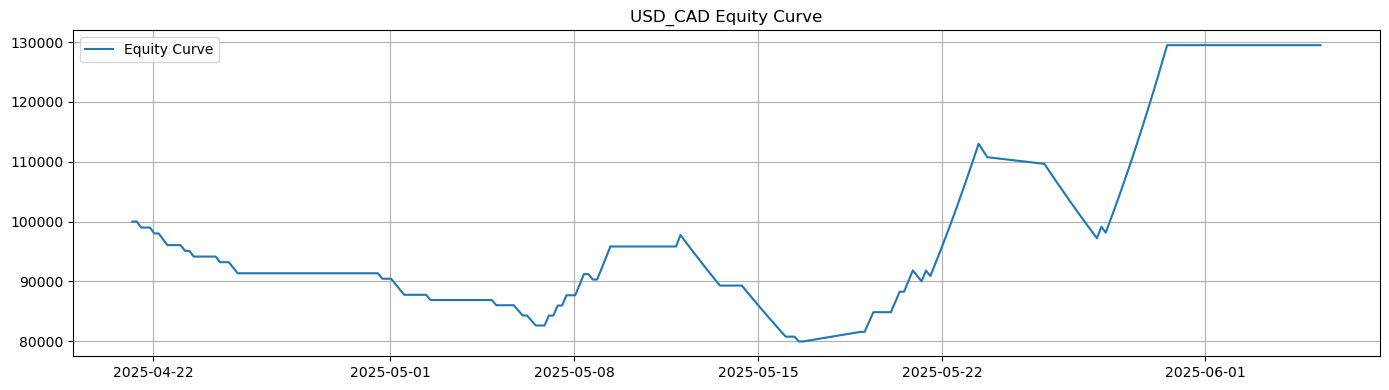

📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.

📈 USD_JPY Signals:
                             Close  Signal
time                                      
2025-06-03 21:00:00+00:00  143.994       0
2025-06-04 01:00:00+00:00  144.257       1
2025-06-04 05:00:00+00:00  143.892       0
2025-06-04 09:00:00+00:00  143.556      -1
2025-06-04 13:00:00+00:00  142.641      -1
2025-06-04 17:00:00+00:00  142.766       0
2025-06-04 21:00:00+00:00  142.666       0
2025-06-05 01:00:00+00:00  143.033       1
2025-06-05 05:00:00+00:00  143.281       1
2025-06-05 09:00:00+00:00  143.148       0
USD_JPY Signal Count:
 Signal
 1    84
 0    62
-1    54
Name: count, dtype: int64
USD_JPY Strategy Count:
 Strategy
Trend              106
None                62
MarketStructure     26
MeanReversion        6
Name: count, dtype: int64


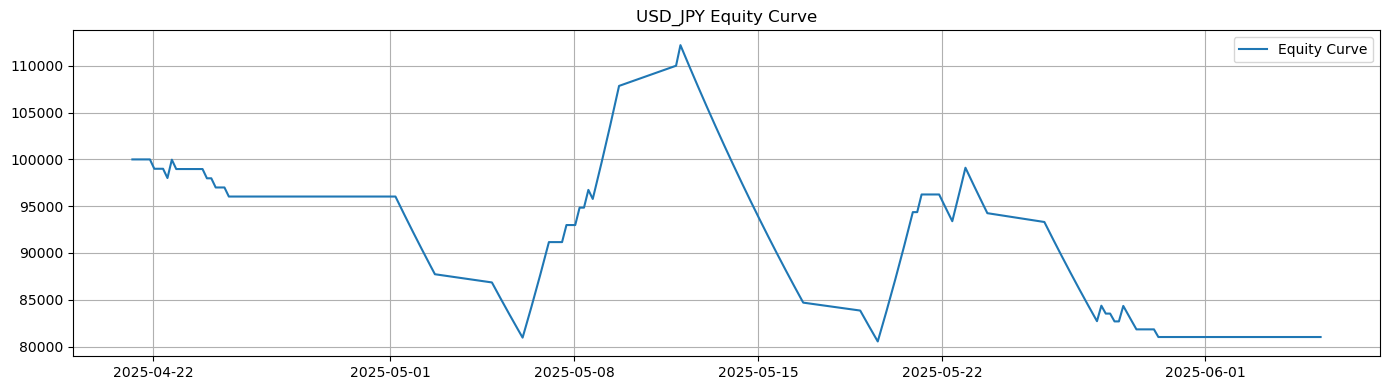


📊 Performance Summary:
Total Return: $-57444.10
Win Rate: 28.01%
Avg Win: $1893.53
Avg Loss: $-886.63
Sharpe Ratio: -1.35
Max Drawdown: 90.42%

🧾 Trade Log:
 Symbol                Entry Time                 Exit Time  Entry Price  Exit Price  Signal          PnL        Strategy
EUR_USD 2025-04-21 13:00:00+00:00 2025-04-21 17:00:00+00:00      1.15094     1.15126      -1 -1000.000000 MarketStructure
EUR_USD 2025-04-21 21:00:00+00:00 2025-04-22 01:00:00+00:00      1.14904     1.15302      -1  -990.000000 MarketStructure
EUR_USD 2025-04-22 01:00:00+00:00 2025-04-22 05:00:00+00:00      1.15302     1.14999       1  -980.100000 MarketStructure
EUR_USD 2025-04-22 09:00:00+00:00 2025-04-22 13:00:00+00:00      1.14704     1.14339      -1  -970.299000 MarketStructure
EUR_USD 2025-04-22 13:00:00+00:00 2025-04-22 17:00:00+00:00      1.14339     1.14209      -1  -960.596010 MarketStructure
EUR_USD 2025-04-22 17:00:00+00:00 2025-04-22 21:00:00+00:00      1.14209     1.13975      -1  1901.980100 Mark

In [39]:
# multi_strategy_trader.py - Fully Improved Version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
count = 200
lookback = 20  # Extended lookback window

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={
        "granularity": granularity,
        "count": count,
        "price": "M"
    })
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic
# -------------------------------------
def trend_following_strategy(df):
    df['EMA20'] = ta.ema(df['Close'], length=20)
    df['EMA50'] = ta.ema(df['Close'], length=50)
    df['Signal'] = 0
    df.loc[df['EMA20'] > df['EMA50'], 'Signal'] = 1
    df.loc[df['EMA20'] < df['EMA50'], 'Signal'] = -1
    return df.copy(), 'Trend'

def mean_reversion_strategy(df):
    df['RSI'] = ta.rsi(df['Close'], length=14)
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1
    df.loc[df['RSI'] > 70, 'Signal'] = -1
    return df.copy(), 'MeanReversion'

def market_structure_strategy(df):
    df['HighShift'] = df['High'].shift(1)
    df['LowShift'] = df['Low'].shift(1)
    df['Signal'] = 0
    df.loc[df['Close'] > df['HighShift'], 'Signal'] = 1
    df.loc[df['Close'] < df['LowShift'], 'Signal'] = -1
    return df.copy(), 'MarketStructure'

# -------------------------------------
# Choose Best Strategy Based on Market Regime
# -------------------------------------
def choose_strategy(df):
    df = df.copy()

    # Calculate ADX for trend strength
    df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'])['ADX_14']
    df['TrendStrength'] = np.where(df['ADX'] > 25, 'StrongTrend',
                                   np.where(df['ADX'] > 20, 'ModerateTrend', 'NoTrend'))

    # Run all strategies independently
    trend_df, _ = trend_following_strategy(df.copy())
    mean_rev_df, _ = mean_reversion_strategy(df.copy())
    ms_df, _ = market_structure_strategy(df.copy())

    # Apply strategy based on trend filter
    df['Signal'] = 0
    df.loc[df['TrendStrength'].isin(['StrongTrend', 'ModerateTrend']), 'Signal'] = trend_df['Signal']
    df.loc[df['TrendStrength'] == 'NoTrend', 'Signal'] = mean_rev_df['Signal']
    df.loc[(df['TrendStrength'] == 'NoTrend') & (mean_rev_df['Signal'] == 0), 'Signal'] = ms_df['Signal']

    # Assign strategy name used at each point
    df['Strategy'] = np.select(
        [
            (df['TrendStrength'] != 'NoTrend') & (trend_df['Signal'] != 0),
            (df['TrendStrength'] == 'NoTrend') & (mean_rev_df['Signal'] != 0),
            (df['TrendStrength'] == 'NoTrend') & (mean_rev_df['Signal'] == 0) & (ms_df['Signal'] != 0)
        ],
        ['Trend', 'MeanReversion', 'MarketStructure'],
        default='None'
    )

    return df

# -------------------------------------
# Simulate Trades with Real ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, symbol, initial_equity=100_000, risk_per_trade=0.01, lookback=20):
    equity = initial_equity
    balance_curve = [equity]
    trade_log = []

    df = df.copy()
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            balance_curve.append(equity)
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:
                if low_next <= sl_price:
                    pnl = -risk_per_trade * equity
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * risk_per_trade * equity
                    pnl = reward
                    exit_found = True
                    break
            else:
                if high_next >= sl_price:
                    pnl = -risk_per_trade * equity
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * risk_per_trade * equity
                    pnl = reward
                    exit_found = True
                    break

        equity += pnl
        balance_curve.append(equity)
        if exit_found:
            trade_log.append({
                'Symbol': symbol,
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl,
                'Strategy': df['Strategy'].iloc[i]
            })

    while len(balance_curve) < len(df):
        balance_curve.append(balance_curve[-1])

    df['Equity'] = balance_curve
    return df, trade_log

# -------------------------------------
# Analyze Performance
# -------------------------------------
def analyze_performance(trade_log, initial_equity=100_000):
    trade_log = pd.DataFrame(trade_log)

    if trade_log.empty:
        print("⚠️ No trades recorded. Cannot compute performance.")
        return

    total_return = trade_log['PnL'].sum()
    win_rate = (trade_log['PnL'] > 0).mean() * 100
    avg_win = trade_log[trade_log['PnL'] > 0]['PnL'].mean()
    avg_loss = trade_log[trade_log['PnL'] < 0]['PnL'].mean()
    sharpe = trade_log['PnL'].mean() / (trade_log['PnL'].std() + 1e-9) * np.sqrt(252)
    cum_returns = trade_log['PnL'].cumsum()
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = (drawdowns.max() / initial_equity) * 100

    print("\n📊 Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd:.2f}%")

    print("\n🧾 Trade Log:")
    print(trade_log.head(20).to_string(index=False))

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    all_trades = []
    for symbol in instruments:
        df = fetch_data(symbol)
        if df is None or df.empty:
            print(f"🚫 Skipping {symbol}, invalid or empty data.")
            continue
        df = choose_strategy(df)
        df, trade_log = simulate_trades(df, symbol=symbol, lookback=lookback)
        all_trades.extend(trade_log)

        print(f"\n📈 {symbol} Signals:")
        print(df[['Close', 'Signal']].tail(10))
        print(f"{symbol} Signal Count:\n", df['Signal'].value_counts())
        print(f"{symbol} Strategy Count:\n", df['Strategy'].value_counts())

        plt.figure(figsize=(14, 4))
        plt.plot(df['Equity'], label='Equity Curve')
        plt.title(f"{symbol} Equity Curve")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

    analyze_performance(all_trades)

# -------------------------------------
if __name__ == "__main__":
    run()

📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

🧾 Trade Log:
                 Entry Time                 Exit Time  Entry Price  \
0 2025-04-02 21:00:00+00:00 2025-04-03 05:00:00+00:00      1.08908   
1 2025-04-03 01:00:00+00:00 2025-04-03 05:00:00+00:00      1.09070   
2 2025-04-03 05:00:00+00:00 2025-04-03 09:00:00+00:00      1.10092   
3 2025-04-03 09:00:00+00:00 2025-04-04 17:00:00+00:00      1.10820   
4 2025-04-10 21:00:00+00:00 2025-04-11 05:00:00+00:00      1.13102   
5 2025-04-11 01:00:00+00:00 2025-04-11 05:00:00+00:00      1.13226   
6 2025-04-20 21:00:00+00:00 2025-04-21 01:00:00+00:00      1.14664   
7 2025-04-21 01:00:00+00:00 2025-04-22 21:00:00+00:00      1.15174   
8 2025-04-21 05:00:00+00:00 2025-04-22 17:00:00+00:00      1.15584   
9 2025-04-21 09:00:00+00:00 2025-04-22 21:00:00+00:00      1.15427   

   Exit Price  Signal     PnL  
0     1.10092      -1 -1000.0  
1     1.10092      -1 -1000.0  
2     1.10820      -1 -1000.0  
3     1.09645      -1  2000.0  
4   

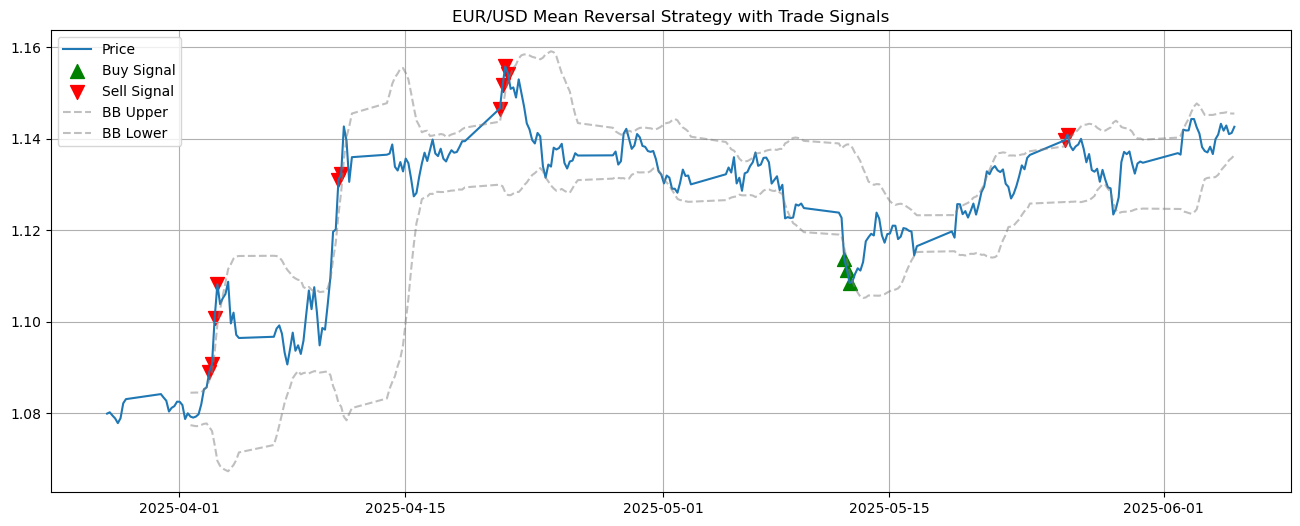

In [57]:
# single_strategy_trader.py - Focused on EUR/USD + Mean Reversal + Trade Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD']  # Only testing with EUR/USD
granularity = 'H4'
count = 300
lookback = 20

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={"granularity": granularity, "count": count, "price": "M"})
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic - Mean Reversion
# -------------------------------------
def mean_reversion_strategy(df):
    df['RSI'] = ta.rsi(df['Close'], length=14)
    bbands = ta.bbands(df['Close'], length=20, std=2)

    # Auto-detect Bollinger Band columns
    cols = list(bbands.columns)
    upper_col = next((col for col in cols if col.startswith('BBU_')), None)
    mid_col = next((col for col in cols if col.startswith('BBM_')), None)
    lower_col = next((col for col in cols if col.startswith('BBL_')), None)

    if not all([upper_col, mid_col, lower_col]):
        raise ValueError("❌ Could not find expected BBand columns")

    df['BB_upper'] = bbands[upper_col]
    df['BB_lower'] = bbands[lower_col]

    df['Signal'] = 0
    df.loc[(df['RSI'] < 30) & (df['Close'] < df['BB_lower']), 'Signal'] = 1
    df.loc[(df['RSI'] > 70) & (df['Close'] > df['BB_upper']), 'Signal'] = -1

    return df

# -------------------------------------
# Simulate Trades with ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, initial_equity=100_000, base_risk=0.01, lookback=20):
    equity = initial_equity
    trade_log = []

    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:
                if low_next <= sl_price:
                    pnl = -base_risk * equity
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * base_risk * equity
                    pnl = reward
                    exit_found = True
                    break
            else:
                if high_next >= sl_price:
                    pnl = -base_risk * equity
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * base_risk * equity
                    pnl = reward
                    exit_found = True
                    break

        if exit_found:
            trade_log.append({
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl
            })

    trade_log = pd.DataFrame(trade_log)
    return df, trade_log

# -------------------------------------
# Plotting Function
# -------------------------------------
def plot_trades(df, trade_log):
    plt.figure(figsize=(16, 6))
    plt.plot(df['Close'], label='Price')
    
    buys = trade_log[trade_log['Signal'] == 1]
    sells = trade_log[trade_log['Signal'] == -1]

    buy_prices = [df.loc[t, 'Close'] if t in df.index else np.nan for t in buys['Entry Time']]
    sell_prices = [df.loc[t, 'Close'] if t in df.index else np.nan for t in sells['Entry Time']]

    plt.scatter(buys['Entry Time'], buy_prices, marker='^', color='green', s=100, label='Buy Signal')
    plt.scatter(sells['Entry Time'], sell_prices, marker='v', color='red', s=100, label='Sell Signal')

    plt.plot(df['BB_upper'], linestyle='--', color='gray', alpha=0.5, label='BB Upper')
    plt.plot(df['BB_lower'], linestyle='--', color='gray', alpha=0.5, label='BB Lower')
    plt.title("EUR/USD Mean Reversal Strategy with Trade Signals")
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    symbol = 'EUR_USD'
    df = fetch_data(symbol)
    if df is None or df.empty:
        print(f"🚫 Skipping {symbol}, invalid or empty data.")
        return

    df = mean_reversion_strategy(df)
    df, trade_log = simulate_trades(df)

    print("\n🧾 Trade Log:")
    print(trade_log.head(10))

    if not trade_log.empty:
        total_return = trade_log['PnL'].sum()
        win_rate = (trade_log['PnL'] > 0).mean() * 100
        avg_win = trade_log[trade_log['PnL'] > 0]['PnL'].mean()
        avg_loss = trade_log[trade_log['PnL'] < 0]['PnL'].mean()
        sharpe = trade_log['PnL'].mean() / (trade_log['PnL'].std() + 1e-9) * np.sqrt(252)
        max_dd = ((np.maximum.accumulate(trade_log['PnL'].cumsum()) -
                  trade_log['PnL'].cumsum()).max())

        print("\n📊 Performance Summary:")
        print(f"Total Return: ${total_return:.2f}")
        print(f"Win Rate: {win_rate:.2f}%")
        print(f"Avg Win: ${avg_win:.2f}")
        print(f"Avg Loss: ${avg_loss:.2f}")
        print(f"Sharpe Ratio: {sharpe:.2f}")
        print(f"Max Drawdown: ${max_dd:.2f}")

    plot_trades(df, trade_log)

# -------------------------------------
if __name__ == "__main__":
    run()

📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

🧾 Trade Log:
                 Entry Time                 Exit Time  Entry Price  \
0 2025-04-10 21:00:00+00:00 2025-04-11 05:00:00+00:00      1.13102   
1 2025-04-11 01:00:00+00:00 2025-04-11 05:00:00+00:00      1.13226   
2 2025-04-21 01:00:00+00:00 2025-04-22 21:00:00+00:00      1.15174   
3 2025-04-21 05:00:00+00:00 2025-04-22 17:00:00+00:00      1.15584   
4 2025-04-21 09:00:00+00:00 2025-04-22 21:00:00+00:00      1.15427   
5 2025-05-12 09:00:00+00:00 2025-05-14 09:00:00+00:00      1.11134   
6 2025-05-12 13:00:00+00:00 2025-05-14 05:00:00+00:00      1.10846   
7 2025-05-26 01:00:00+00:00 2025-05-28 05:00:00+00:00      1.14094   

   Exit Price  Signal     PnL  
0     1.14272      -1 -1000.0  
1     1.14272      -1 -1000.0  
2     1.13975      -1  2000.0  
3     1.14209      -1  2000.0  
4     1.13975      -1  2000.0  
5     1.12255       1  2000.0  
6     1.12387       1  2000.0  
7     1.13322      -1  2000.0  

📊 Performance S

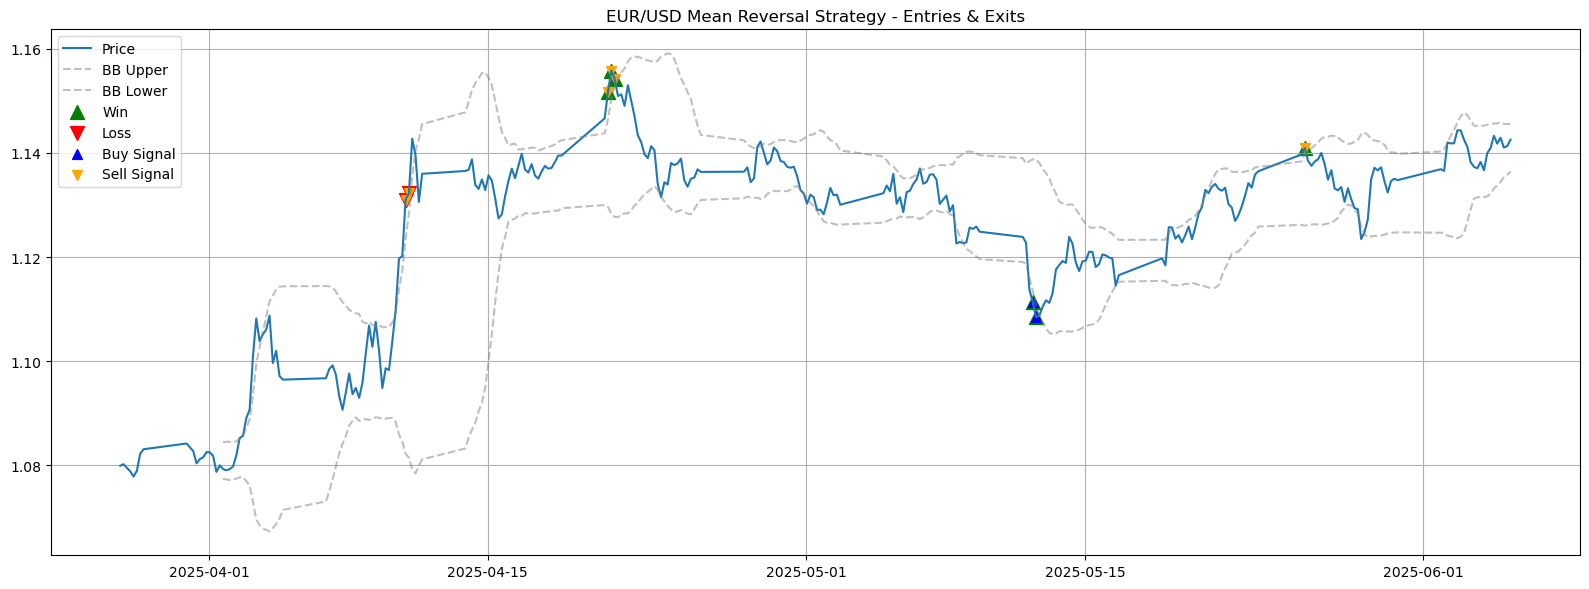

In [59]:
# single_strategy_trader.py - EUR_USD Mean Reversal Strategy with Improvements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD']
granularity = 'H4'
count = 300
lookback = 20
initial_equity = 100_000
risk_percent = 0.01  # 1% of equity per trade

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={"granularity": granularity, "count": count, "price": "M"})
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic - Enhanced Mean Reversal
# -------------------------------------
def mean_reversion_strategy(df):
    df = df.copy()

    # RSI & BBands
    df['RSI'] = ta.rsi(df['Close'], length=14)
    bbands = ta.bbands(df['Close'], length=20, std=2)

    # Auto-detect correct BBand columns
    cols = list(bbands.columns)
    upper_col = next((col for col in cols if col.startswith('BBU_')), None)
    lower_col = next((col for col in cols if col.startswith('BBL_')), None)

    df['BB_upper'] = bbands[upper_col]
    df['BB_lower'] = bbands[lower_col]

    # MACD filter
    macd = ta.macd(df['Close'])
    df['MACD'] = macd['MACD_12_26_9']
    df['MACD_Signal'] = macd['MACDs_12_26_9']

    # Signal logic with confirmation candle + MACD filter
    df['Signal'] = 0
    # Short: RSI > 70 AND closed above BB_upper AND MACD < signal
    df.loc[(df['RSI'] > 70) &
           (df['Close'].shift(1) > df['BB_lower'].shift(1)) &
           (df['Close'] < df['BB_lower']) &
           (df['MACD'] < df['MACD_Signal']), 'Signal'] = 1

    df.loc[(df['RSI'] < 30) &
           (df['Close'].shift(1) < df['BB_lower'].shift(1)) &
           (df['Close'] < df['BB_lower']) &
           (df['MACD'] < df['MACD_Signal']), 'Signal'] = 1

    df.loc[(df['RSI'] > 70) &
           (df['Close'].shift(1) > df['BB_upper'].shift(1)) &
           (df['Close'] > df['BB_upper']) &
           (df['MACD'] > df['MACD_Signal']), 'Signal'] = -1

    df.loc[(df['RSI'] < 30) &
           (df['Close'].shift(1) < df['BB_lower'].shift(1)) &
           (df['Close'] > df['BB_lower']) &
           (df['MACD'] > df['MACD_Signal']), 'Signal'] = -1

    return df

# -------------------------------------
# Simulate Trades with Real ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, initial_equity=100_000, risk_per_trade=0.01, lookback=20):
    equity = initial_equity
    trade_log = []

    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:
                if low_next <= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break
            else:
                if high_next >= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break

        if exit_found:
            trade_log.append({
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl
            })

    trade_log = pd.DataFrame(trade_log)
    return df, trade_log

# -------------------------------------
# Plotting Function
# -------------------------------------
def plot_trades(df, trade_log):
    plt.figure(figsize=(16, 6))
    plt.plot(df['Close'], label='Price')
    plt.plot(df['BB_upper'], linestyle='--', color='gray', alpha=0.5, label='BB Upper')
    plt.plot(df['BB_lower'], linestyle='--', color='gray', alpha=0.5, label='BB Lower')

    if not trade_log.empty:
        wins = trade_log[trade_log['PnL'] > 0]
        losses = trade_log[trade_log['PnL'] < 0]

        buy_signals = trade_log[trade_log['Signal'] == 1]
        sell_signals = trade_log[trade_log['Signal'] == -1]

        # Wins vs Losses
        plt.scatter(wins['Entry Time'], df.loc[wins['Entry Time'], 'Close'],
                    marker='^', color='green', s=100, label='Win')
        plt.scatter(losses['Entry Time'], df.loc[losses['Entry Time'], 'Close'],
                    marker='v', color='red', s=100, label='Loss')

        # Entry Signals
        plt.scatter(buy_signals['Entry Time'], df.loc[buy_signals['Entry Time'], 'Close'],
                    marker='^', color='blue', s=50, label='Buy Signal')
        plt.scatter(sell_signals['Entry Time'], df.loc[sell_signals['Entry Time'], 'Close'],
                    marker='v', color='orange', s=50, label='Sell Signal')

    plt.title("EUR/USD Mean Reversal Strategy - Entries & Exits")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------
# Analyze Performance
# -------------------------------------
def analyze_performance(trade_log, initial_equity=100_000):
    if trade_log.empty:
        print("⚠️ No trades recorded.")
        return

    total_return = trade_log['PnL'].sum()
    win_rate = (trade_log['PnL'] > 0).mean() * 100
    avg_win = trade_log[trade_log['PnL'] > 0]['PnL'].mean()
    avg_loss = trade_log[trade_log['PnL'] < 0]['PnL'].mean()
    sharpe = trade_log['PnL'].mean() / (trade_log['PnL'].std() + 1e-9) * np.sqrt(252)
    cum_returns = trade_log['PnL'].cumsum()
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = drawdowns.max()

    print("\n📊 Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: ${max_dd:.2f}")

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    symbol = 'EUR_USD'
    df = fetch_data(symbol)
    if df is None or df.empty:
        print(f"🚫 Skipping {symbol}, invalid or empty data.")
        return

    df = mean_reversion_strategy(df)
    df, trade_log = simulate_trades(df, initial_equity=initial_equity, risk_per_trade=risk_percent, lookback=lookback)

    print("\n🧾 Trade Log:")
    print(trade_log.head(10))

    analyze_performance(trade_log, initial_equity=initial_equity)
    plot_trades(df, trade_log)

# -------------------------------------
if __name__ == "__main__":
    run()

📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.

🔍 EUR_USD Signal Count:
 Signal
 0    297
-1      2
 1      1
Name: count, dtype: int64
📈 EUR_USD Signals Sample:
                              Close        RSI  BB_upper  BB_lower  Signal
time                                                                     
2025-06-03 21:00:00+00:00  1.13828  52.123650  1.145240  1.131537       0
2025-06-04 01:00:00+00:00  1.13668  48.384079  1.145240  1.131539       0
2025-06-04 05:00:00+00:00  1.13995  55.423058  1.145387  1.131662       0
2025-06-04 09:00:00+00:00  1.14096  57.357378  1.145535  1.132150       0
2025-06-04 13:00:00+00:00  1.14330  61.523160  1.145654  1.133121       0
2025-06-04 17:00:00+00:00  1.14180  57.636217  1.145693  1.133801       0
2025-06-04 21:00:00+00:00  1.14292  59.684334  1.145826  1.134456       0
2025-06-05 01:00:00+00:00  1.14104  54.887466  1.145586  1.135322       0
2025-06-05 05:00:00+00:00  1.14130  55.421080  1.145547  1.135803       0
2025-06-05 09:00:00

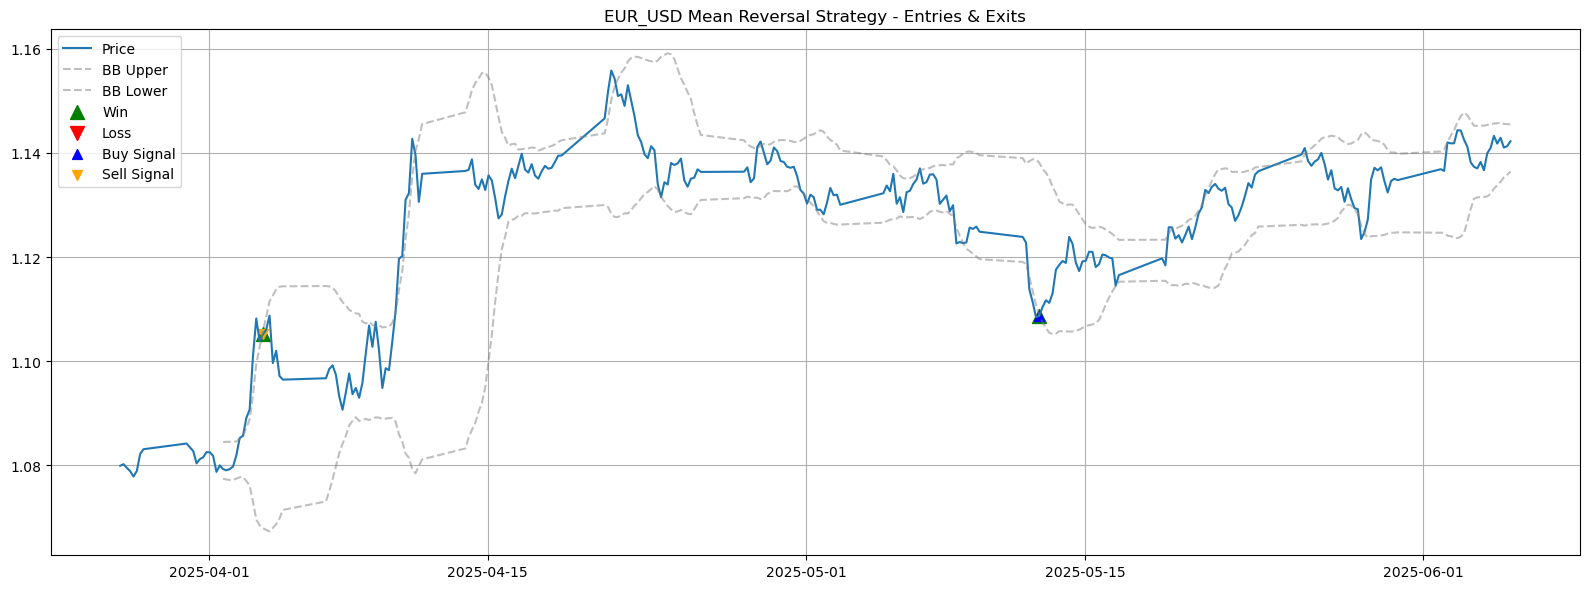

📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.

🔍 GBP_USD Signal Count:
 Signal
 0    297
-1      2
 1      1
Name: count, dtype: int64
📈 GBP_USD Signals Sample:
                              Close        RSI  BB_upper  BB_lower  Signal
time                                                                     
2025-06-03 21:00:00+00:00  1.35269  54.965920  1.356249  1.344922       0
2025-06-04 01:00:00+00:00  1.35123  51.346372  1.356320  1.345052       0
2025-06-04 05:00:00+00:00  1.35401  57.134586  1.356696  1.345109       0
2025-06-04 09:00:00+00:00  1.35434  57.776733  1.356972  1.345551       0
2025-06-04 13:00:00+00:00  1.35714  62.860574  1.357625  1.345952       0
2025-06-04 17:00:00+00:00  1.35530  57.924864  1.357997  1.346184       0
2025-06-04 21:00:00+00:00  1.35598  59.199860  1.358036  1.347135       0
2025-06-05 01:00:00+00:00  1.35474  55.874821  1.357437  1.348676       0
2025-06-05 05:00:00+00:00  1.35676  59.832705  1.357669  1.349234       0
2025-06-05 09:00:00

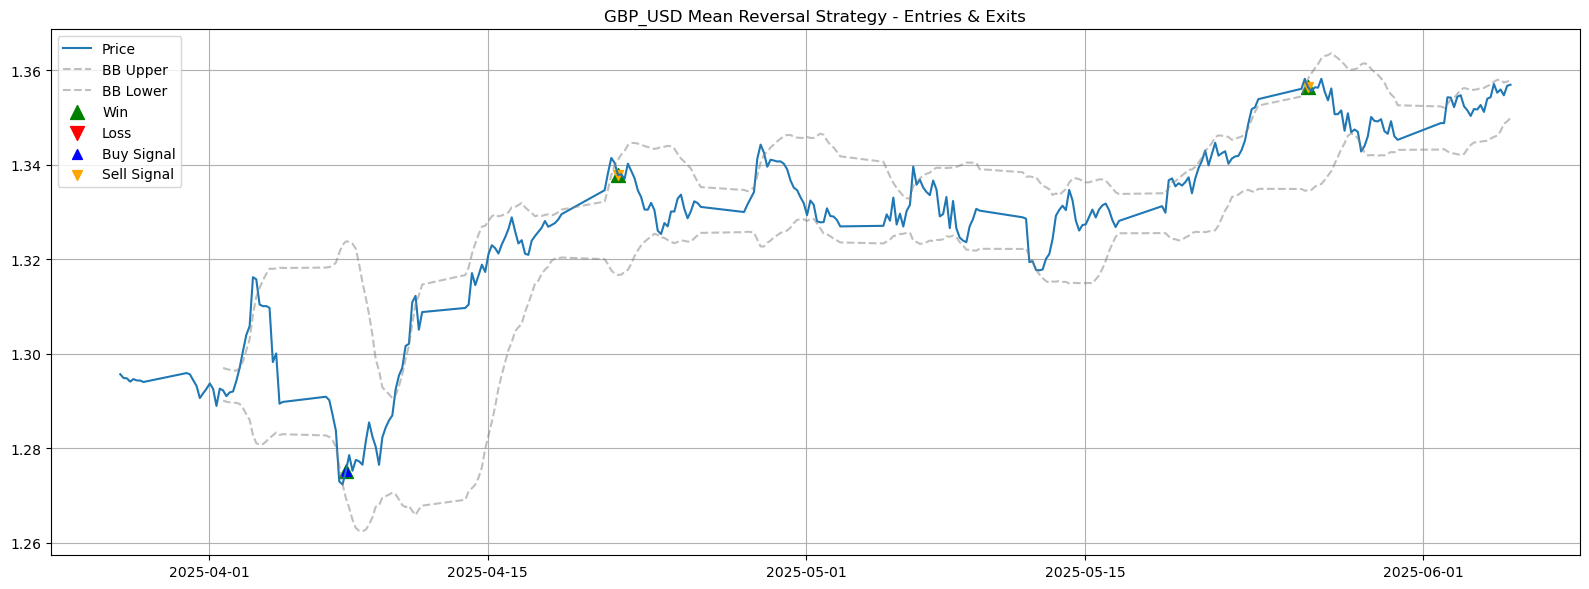

📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.

🔍 AUD_USD Signal Count:
 Signal
0    299
1      1
Name: count, dtype: int64
📈 AUD_USD Signals Sample:
                              Close        RSI  BB_upper  BB_lower  Signal
time                                                                     
2025-06-03 21:00:00+00:00  0.64607  51.238081  0.650311  0.640931       0
2025-06-04 01:00:00+00:00  0.64562  49.393059  0.650337  0.641045       0
2025-06-04 05:00:00+00:00  0.64746  56.319172  0.650513  0.641151       0
2025-06-04 09:00:00+00:00  0.64925  61.796872  0.650864  0.641423       0
2025-06-04 13:00:00+00:00  0.65034  64.699840  0.651136  0.642035       0
2025-06-04 17:00:00+00:00  0.64921  59.640206  0.651156  0.642712       0
2025-06-04 21:00:00+00:00  0.65017  62.335034  0.651242  0.643393       0
2025-06-05 01:00:00+00:00  0.64928  58.439290  0.651142  0.644102       0
2025-06-05 05:00:00+00:00  0.65054  62.054881  0.651479  0.644259       0
2025-06-05 09:00:00+00:00  0.65

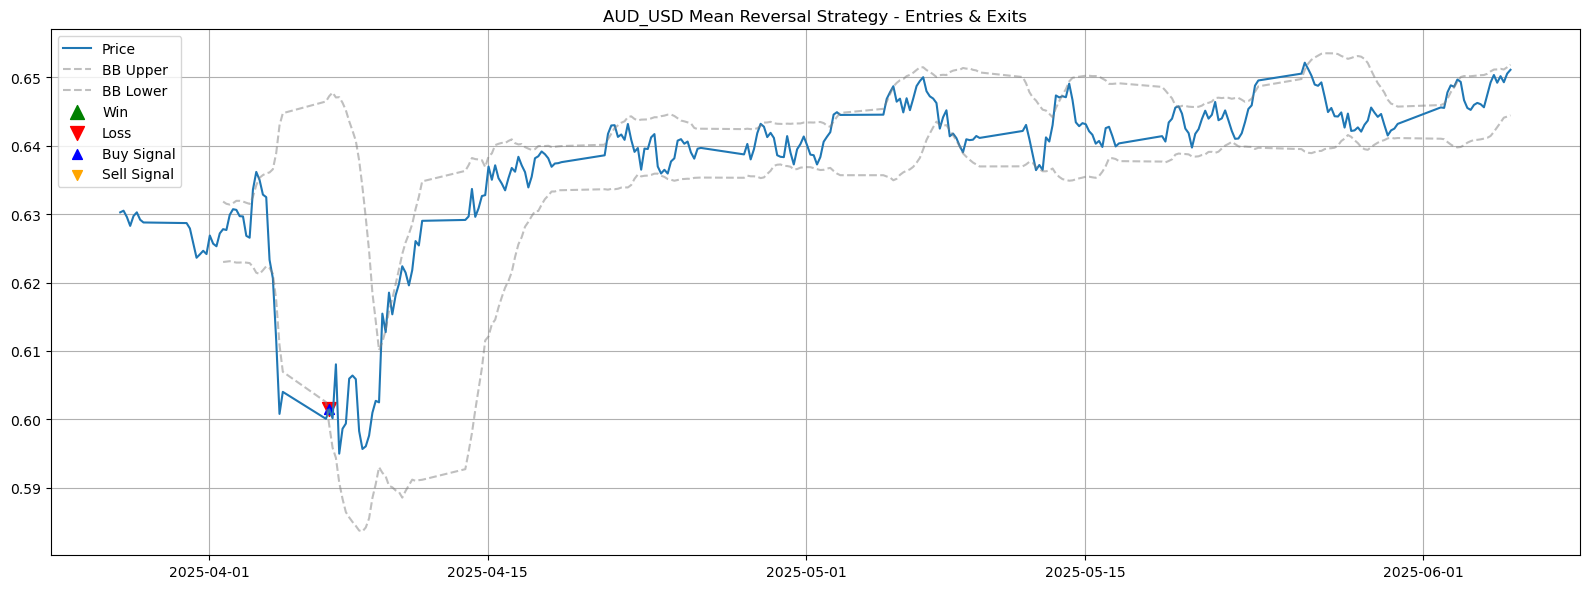

📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.

🔍 USD_CAD Signal Count:
 Signal
 0    294
 1      5
-1      1
Name: count, dtype: int64
📈 USD_CAD Signals Sample:
                              Close        RSI  BB_upper  BB_lower  Signal
time                                                                     
2025-06-03 21:00:00+00:00  1.37138  36.655408  1.382560  1.366234       0
2025-06-04 01:00:00+00:00  1.37226  40.415909  1.381619  1.366318       0
2025-06-04 05:00:00+00:00  1.37088  36.733134  1.380482  1.366436       0
2025-06-04 09:00:00+00:00  1.37000  34.569873  1.378797  1.366911       0
2025-06-04 13:00:00+00:00  1.36555  26.175212  1.377261  1.366820       0
2025-06-04 17:00:00+00:00  1.36794  35.267080  1.375766  1.367169       0
2025-06-04 21:00:00+00:00  1.36726  33.984663  1.375261  1.366832       0
2025-06-05 01:00:00+00:00  1.36787  36.225013  1.374964  1.366527       0
2025-06-05 05:00:00+00:00  1.36646  33.403170  1.375057  1.365900       0
2025-06-05 09:00:00

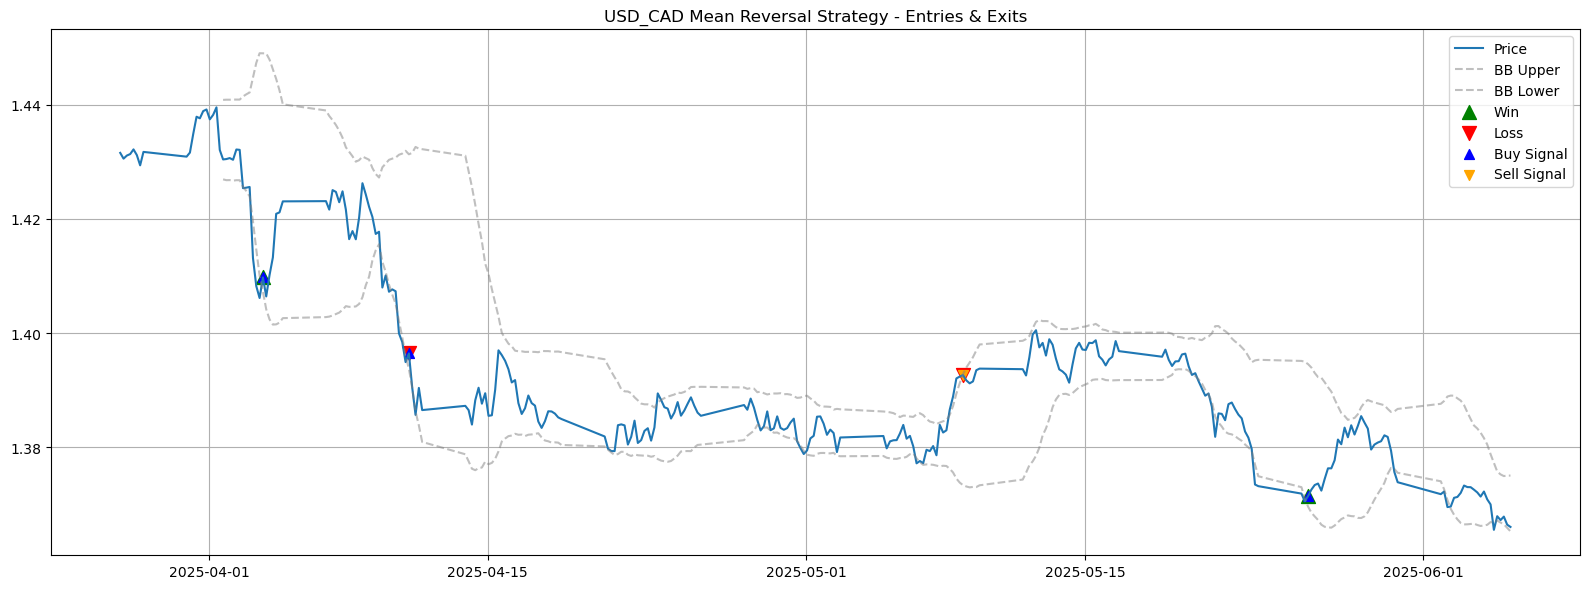

📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.

🔍 USD_JPY Signal Count:
 Signal
 0    295
 1      3
-1      2
Name: count, dtype: int64
📈 USD_JPY Signals Sample:
                              Close        RSI    BB_upper    BB_lower  Signal
time                                                                         
2025-06-03 21:00:00+00:00  143.994  55.225345  144.523667  142.456433       0
2025-06-04 01:00:00+00:00  144.257  58.404805  144.537193  142.450007       0
2025-06-04 05:00:00+00:00  143.892  52.800976  144.550674  142.448326       0
2025-06-04 09:00:00+00:00  143.556  48.214828  144.532239  142.444561       0
2025-06-04 13:00:00+00:00  142.641  38.426592  144.489453  142.345847       0
2025-06-04 17:00:00+00:00  142.766  40.212295  144.467469  142.271731       0
2025-06-04 21:00:00+00:00  142.666  39.232057  144.418387  142.197513       0
2025-06-05 01:00:00+00:00  143.033  44.572183  144.317037  142.196163       0
2025-06-05 05:00:00+00:00  143.281  47.903787  144.29

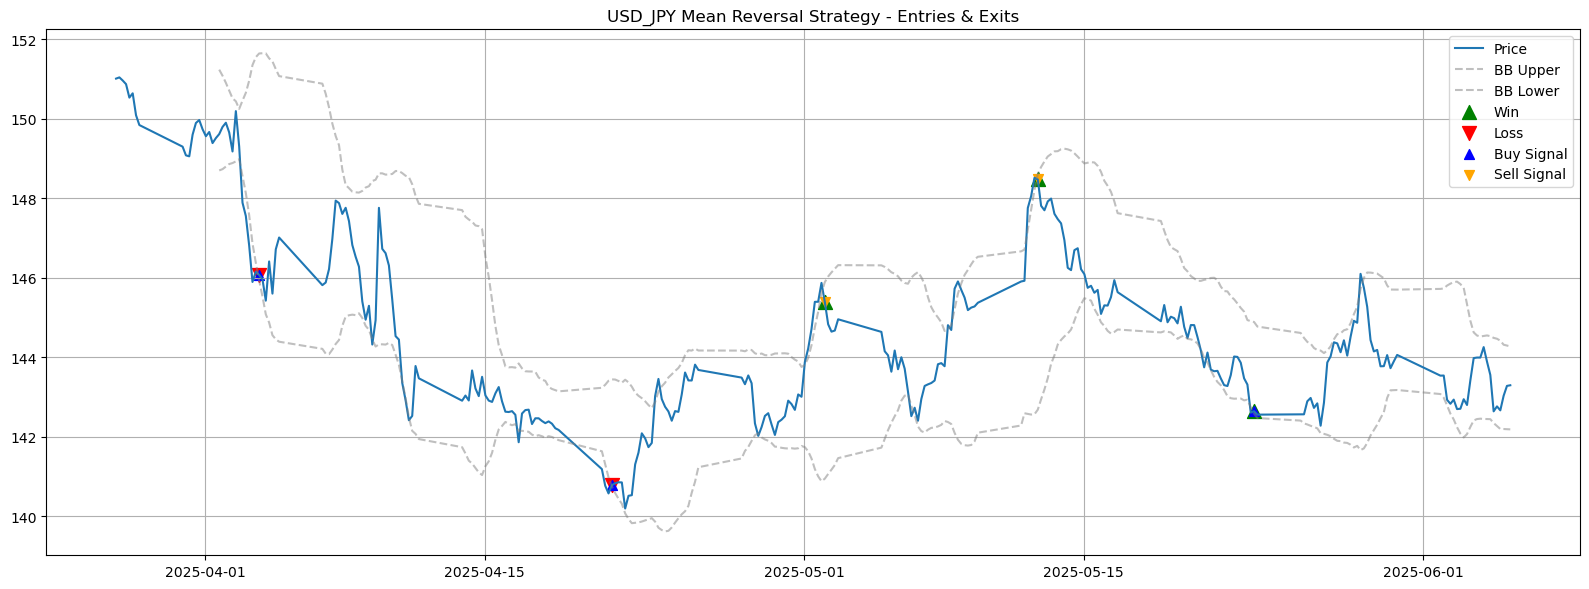


📊 Overall Performance Summary:
Total Return: $15139.40
Win Rate: 66.67%
Avg Win: $2015.92
Avg Loss: $-1003.96
Sharpe Ratio: 10.87
Max Drawdown: $2029.80

🧾 Trade Log (First 10):
    Symbol                Entry Time                 Exit Time  Entry Price  \
0  EUR_USD 2025-04-03 17:00:00+00:00 2025-04-06 21:00:00+00:00      1.10514   
1  EUR_USD 2025-05-12 17:00:00+00:00 2025-05-14 05:00:00+00:00      1.10876   
2  GBP_USD 2025-04-07 21:00:00+00:00 2025-04-10 09:00:00+00:00      1.27518   
3  GBP_USD 2025-04-21 13:00:00+00:00 2025-04-22 21:00:00+00:00      1.33790   
4  GBP_USD 2025-05-26 05:00:00+00:00 2025-05-28 13:00:00+00:00      1.35644   
5  AUD_USD 2025-04-07 01:00:00+00:00 2025-04-08 21:00:00+00:00      0.60146   
6  USD_CAD 2025-04-03 17:00:00+00:00 2025-04-04 17:00:00+00:00      1.40974   
7  USD_CAD 2025-04-11 01:00:00+00:00 2025-04-11 09:00:00+00:00      1.39645   
8  USD_CAD 2025-05-08 21:00:00+00:00 2025-05-12 05:00:00+00:00      1.39265   
9  USD_CAD 2025-05-26 05:00:00+

In [73]:
# multi_strategy_trader.py - Mean Reversal Strategy (RSI + BBands Only)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
count = 300
lookback = 20
initial_equity = 100_000
risk_percent = 0.01  # 1% per trade

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={"granularity": granularity, "count": count, "price": "M"})
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc['Volume'] = df['volume']
    ohlc.index = df.index
    return ohlc

# -------------------------------------
# Strategy Logic - Mean Reversal: RSI + BBands (No MACD)
# -------------------------------------
def mean_reversion_strategy(df):
    df = df.copy()

    # RSI & BBands
    df['RSI'] = ta.rsi(df['Close'], length=14)
    bbands = ta.bbands(df['Close'], length=20, std=2)

    # Auto-detect correct BBand columns
    cols = list(bbands.columns)
    upper_col = next((col for col in cols if col.startswith('BBU_')), None)
    lower_col = next((col for col in cols if col.startswith('BBL_')), None)

    df['BB_upper'] = bbands[upper_col] if upper_col else np.nan
    df['BB_lower'] = bbands[lower_col] if lower_col else np.nan

    # Reset Signal
    df['Signal'] = 0

    # Long Signal: RSI < 30 + Price bounces off BB Lower
    df.loc[(df['RSI'] < 30) &
           (df['Close'].shift(1) <= df['BB_lower'].shift(1)) &
           (df['Close'] > df['BB_lower']), 'Signal'] = 1

    # Short Signal: RSI > 70 + Price rejects BB Upper
    df.loc[(df['RSI'] > 70) &
           (df['Close'].shift(1) >= df['BB_upper'].shift(1)) &
           (df['Close'] < df['BB_upper']), 'Signal'] = -1

    return df

# -------------------------------------
# Simulate Trades with Real ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, symbol, initial_equity=100_000, risk_per_trade=0.01, lookback=20):
    equity = initial_equity
    balance_curve = [equity]
    trade_log = []

    df = df.copy()
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            balance_curve.append(equity)
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:  # Long
                if low_next <= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break
            else:  # Short
                if high_next >= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break

        equity += pnl
        balance_curve.append(equity)

        if exit_found:
            trade_log.append({
                'Symbol': symbol,
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl
            })

    while len(balance_curve) < len(df):
        balance_curve.append(balance_curve[-1])

    df['Equity'] = balance_curve
    return df, trade_log

# -------------------------------------
# Plotting Function
# -------------------------------------
def plot_trades(df, trade_log_df, symbol):
    plt.figure(figsize=(16, 6))
    plt.plot(df['Close'], label='Price')
    plt.plot(df['BB_upper'], linestyle='--', color='gray', alpha=0.5, label='BB Upper')
    plt.plot(df['BB_lower'], linestyle='--', color='gray', alpha=0.5, label='BB Lower')

    if not trade_log_df.empty:
        wins = trade_log_df[trade_log_df['PnL'] > 0]
        losses = trade_log_df[trade_log_df['PnL'] < 0]

        buy_signals = trade_log_df[trade_log_df['Signal'] == 1]
        sell_signals = trade_log_df[trade_log_df['Signal'] == -1]

        plt.scatter(wins['Entry Time'], df.loc[wins['Entry Time'], 'Close'],
                    marker='^', color='green', s=100, label='Win')
        plt.scatter(losses['Entry Time'], df.loc[losses['Entry Time'], 'Close'],
                    marker='v', color='red', s=100, label='Loss')

        plt.scatter(buy_signals['Entry Time'], df.loc[buy_signals['Entry Time'], 'Close'],
                    marker='^', color='blue', s=50, label='Buy Signal')
        plt.scatter(sell_signals['Entry Time'], df.loc[sell_signals['Entry Time'], 'Close'],
                    marker='v', color='orange', s=50, label='Sell Signal')

    plt.title(f"{symbol} Mean Reversal Strategy - Entries & Exits")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------
# Analyze Performance
# -------------------------------------
def analyze_performance(all_trades, initial_equity=100_000):
    if not all_trades:
        print("⚠️ No trades recorded across any instrument.")
        return

    trade_log_df = pd.DataFrame(all_trades)
    total_return = trade_log_df['PnL'].sum()
    win_rate = (trade_log_df['PnL'] > 0).mean() * 100
    avg_win = trade_log_df[trade_log_df['PnL'] > 0]['PnL'].mean()
    avg_loss = trade_log_df[trade_log_df['PnL'] < 0]['PnL'].mean()
    sharpe = trade_log_df['PnL'].mean() / (trade_log_df['PnL'].std() + 1e-9) * np.sqrt(252)
    cum_returns = trade_log_df['PnL'].cumsum()
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = drawdowns.max()

    print("\n📊 Overall Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: ${max_dd:.2f}")

    print("\n🧾 Trade Log (First 10):")
    print(trade_log_df.head(10))

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    all_trades = []

    for symbol in instruments:
        df = fetch_data(symbol)
        if df is None or df.empty:
            print(f"🚫 Skipping {symbol}, invalid or empty data.")
            continue

        df = mean_reversion_strategy(df)
        df, trade_log = simulate_trades(df, symbol=symbol, initial_equity=initial_equity, risk_per_trade=risk_percent, lookback=lookback)
        all_trades.extend(trade_log)

        print(f"\n🔍 {symbol} Signal Count:\n", df['Signal'].value_counts())
        print(f"📈 {symbol} Signals Sample:\n", df[['Close', 'RSI', 'BB_upper', 'BB_lower', 'Signal']].tail(10))

        trade_log_df = pd.DataFrame(trade_log)
        plot_trades(df, trade_log_df, symbol)

    analyze_performance(all_trades, initial_equity=initial_equity)

# -------------------------------------
if __name__ == "__main__":
    run()


🔁 Starting Walk-Forward Test for EUR_USD
📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.
🔍 EUR_USD Test Window: 2025-05-13 21:00:00+00:00 → 2025-06-05 09:00:00+00:00
📉 RSI Range: 32.98 - 72.07
📉 BB_upper: 1.12333 - 1.14775
📉 BB_lower: 1.11404 - 1.13643


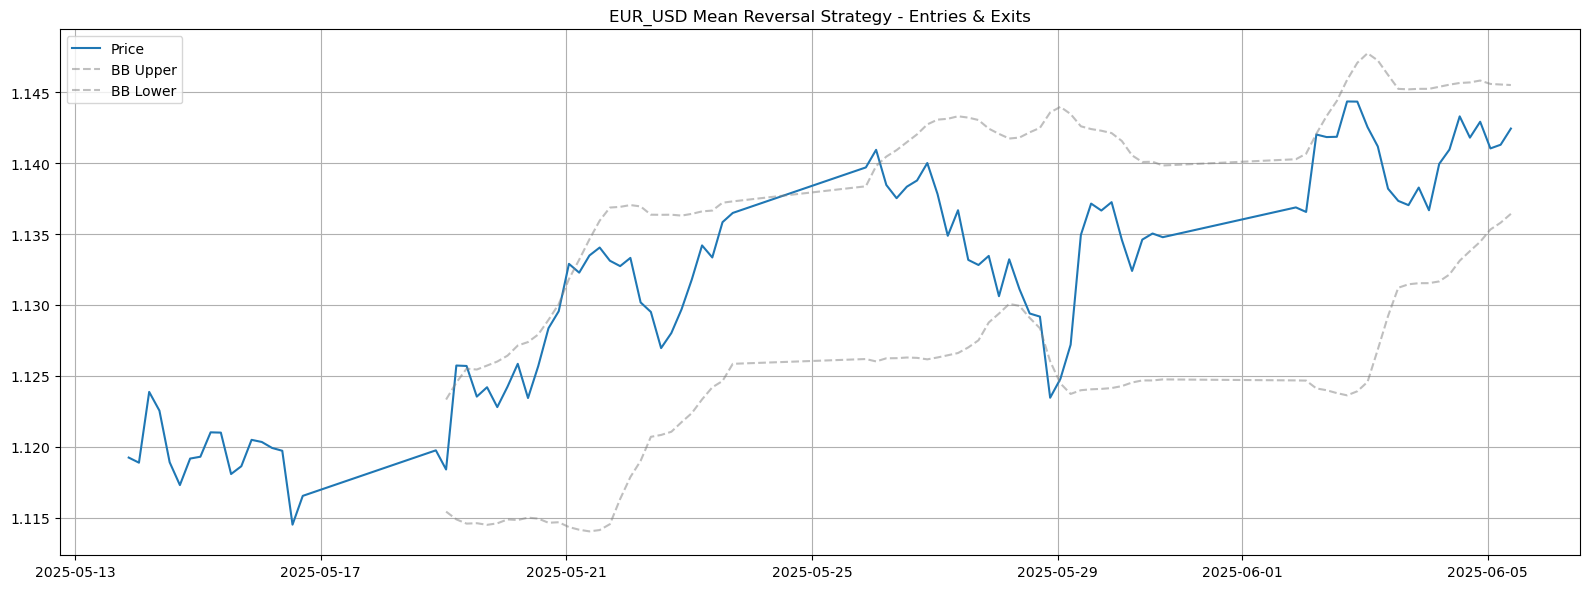


🔁 Starting Walk-Forward Test for GBP_USD
📊 Fetching GBP_USD (H4)...
✅ GBP_USD data fetched.
🔍 GBP_USD Test Window: 2025-05-13 21:00:00+00:00 → 2025-06-05 09:00:00+00:00
📉 RSI Range: 39.27 - 78.88
📉 BB_upper: 1.33397 - 1.36365
📉 BB_lower: 1.32403 - 1.34992


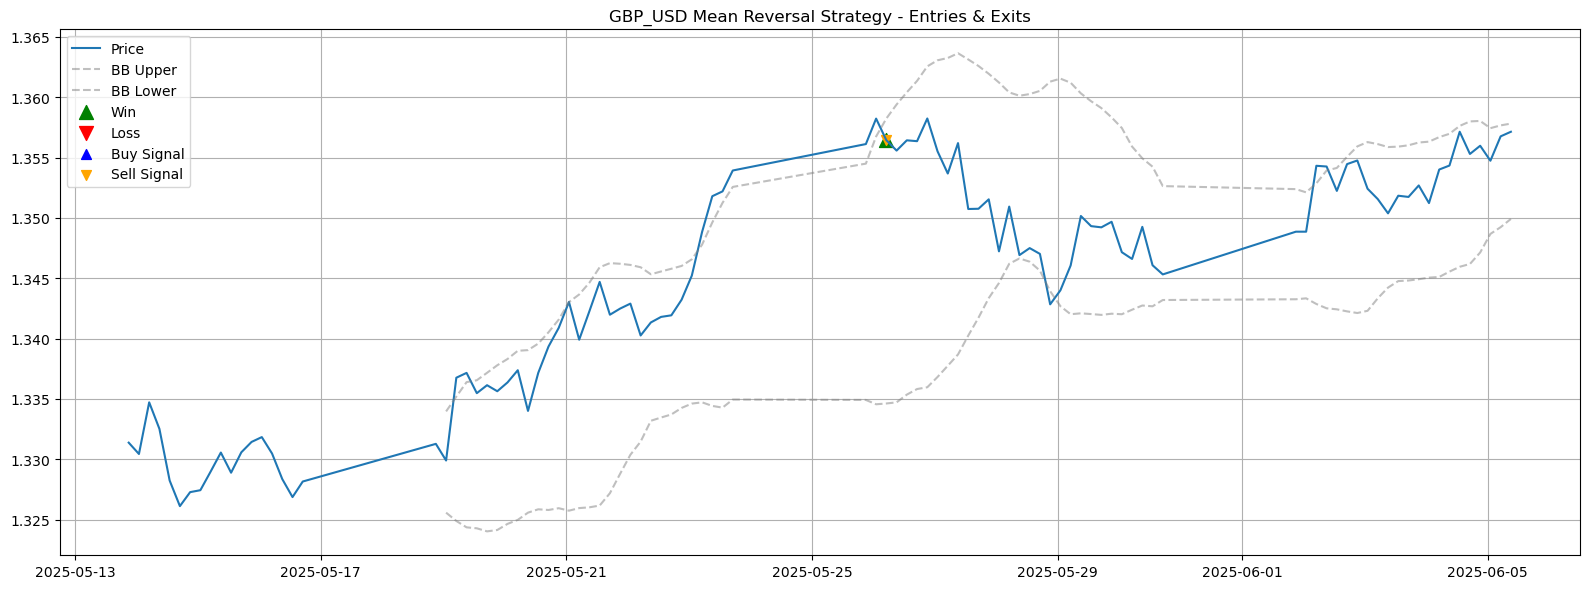


🔁 Starting Walk-Forward Test for AUD_USD
📊 Fetching AUD_USD (H4)...
✅ AUD_USD data fetched.
🔍 AUD_USD Test Window: 2025-05-13 21:00:00+00:00 → 2025-06-05 09:00:00+00:00
📉 RSI Range: 30.03 - 69.94
📉 BB_upper: 0.64564 - 0.65352
📉 BB_lower: 0.63757 - 0.64447


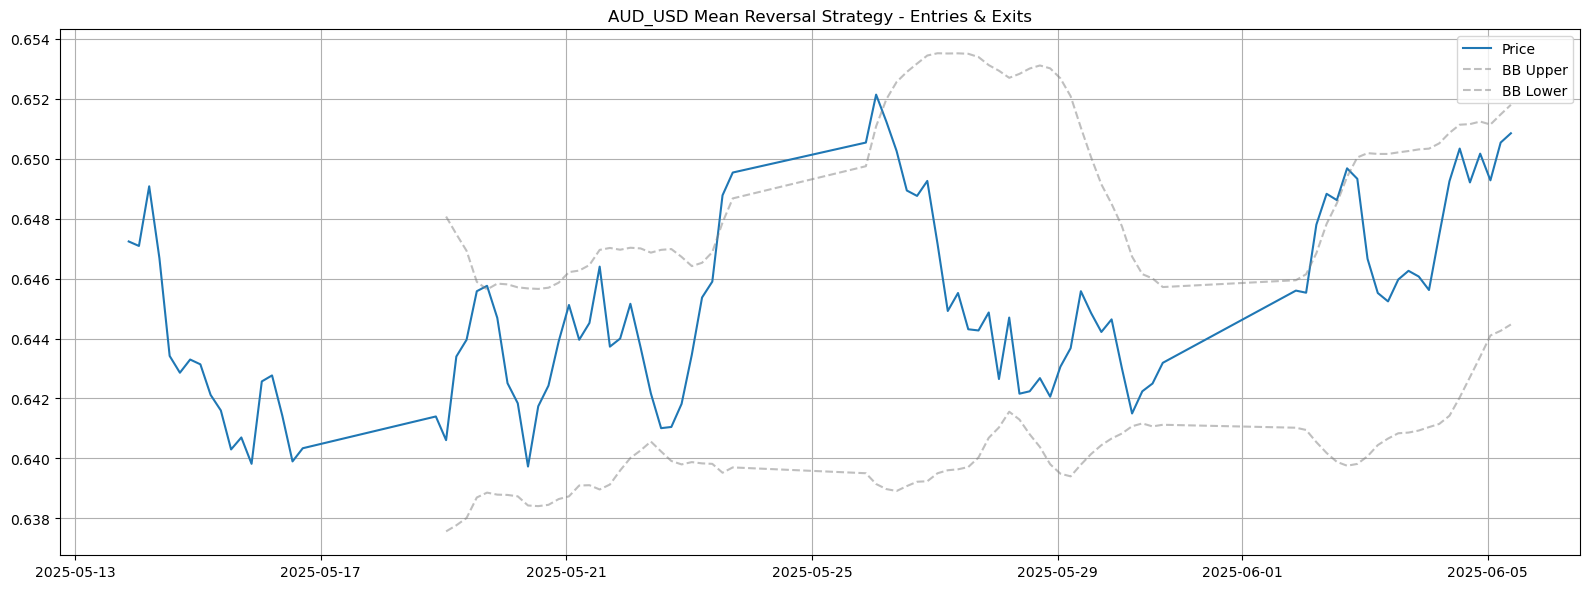


🔁 Starting Walk-Forward Test for USD_CAD
📊 Fetching USD_CAD (H4)...
✅ USD_CAD data fetched.
🔍 USD_CAD Test Window: 2025-05-13 21:00:00+00:00 → 2025-06-05 09:00:00+00:00
📉 RSI Range: 19.23 - 63.72
📉 BB_upper: 1.37496 - 1.40123
📉 BB_lower: 1.36527 - 1.39369


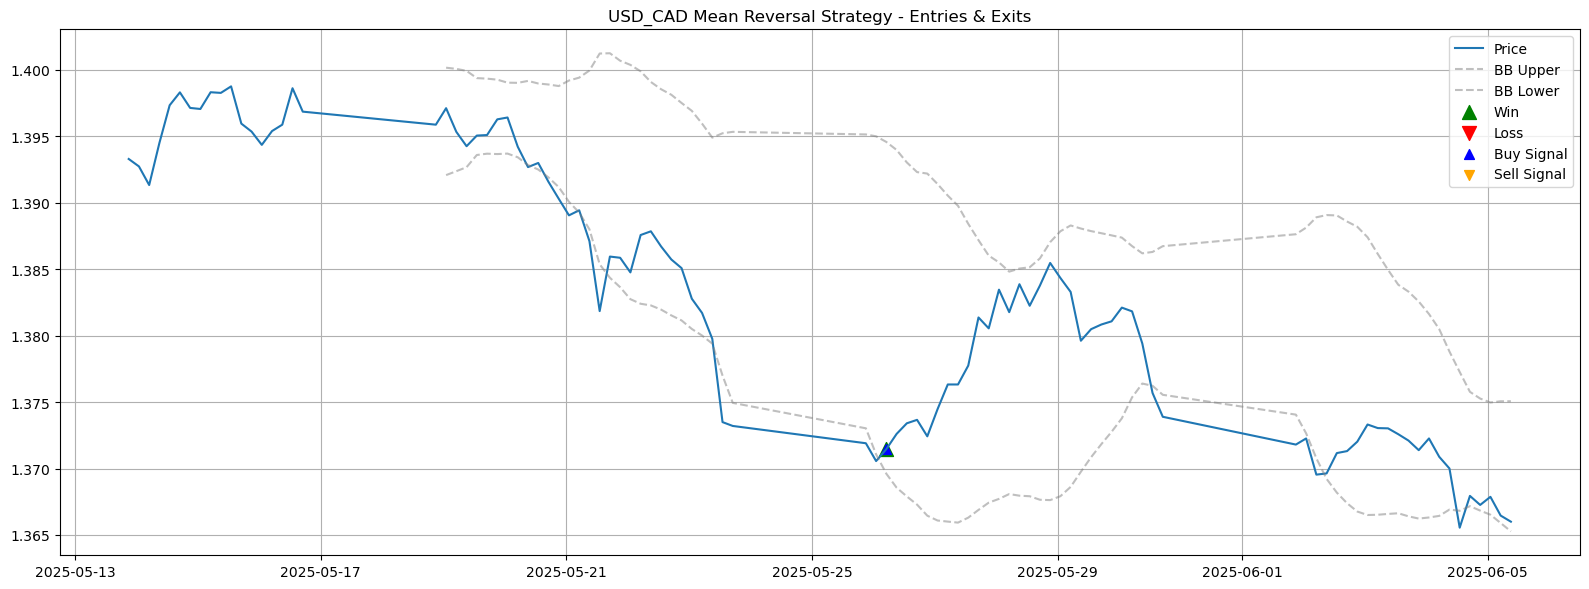


🔁 Starting Walk-Forward Test for USD_JPY
📊 Fetching USD_JPY (H4)...
✅ USD_JPY data fetched.
🔍 USD_JPY Test Window: 2025-05-13 21:00:00+00:00 → 2025-06-05 09:00:00+00:00
📉 RSI Range: 23.10 - 71.63
📉 BB_upper: 144.10654 - 147.18469
📉 BB_lower: 141.66583 - 144.65541


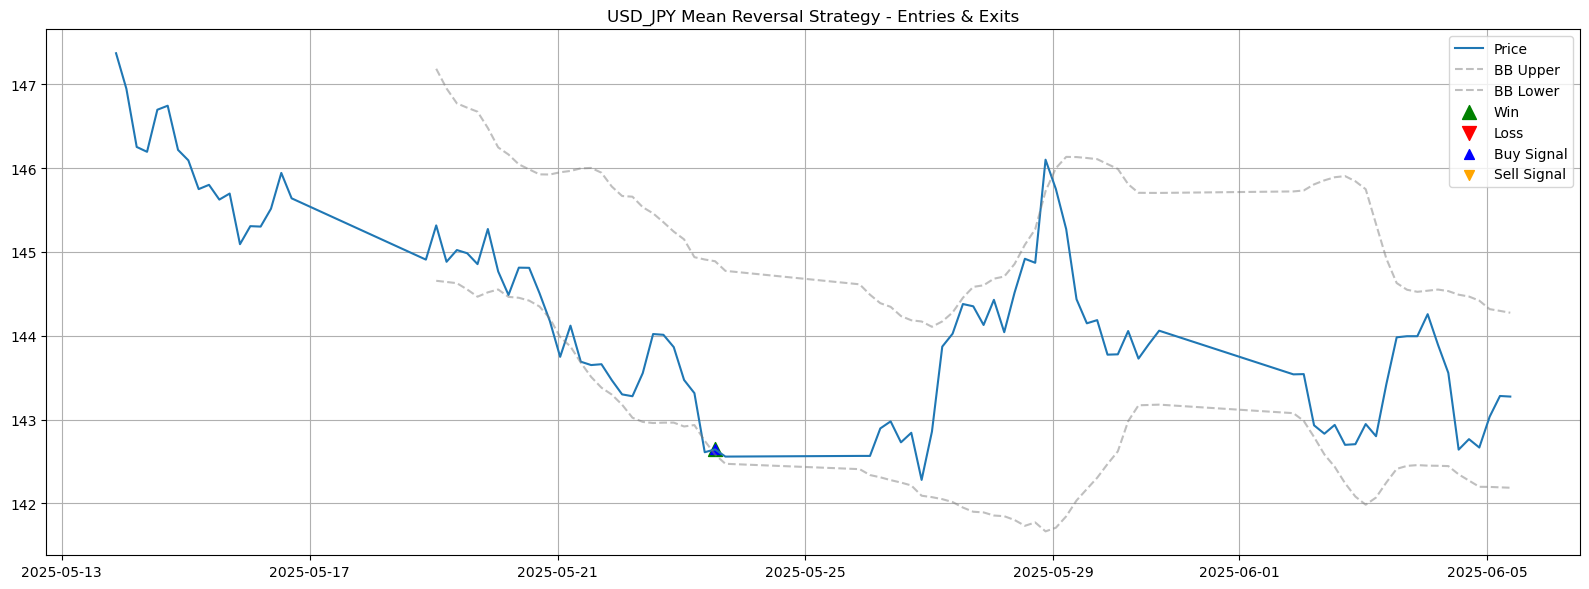


📊 Walk-Forward Performance Summary:
Total Return: $6000.00
Win Rate: 100.00%
Avg Win: $2000.00
Avg Loss: $nan
Sharpe Ratio: 30877524859108.86
Max Drawdown: $0.00

🧾 Trade Log (First 10):
    Symbol                Entry Time                 Exit Time  Entry Price  \
0  GBP_USD 2025-05-26 05:00:00+00:00 2025-05-28 13:00:00+00:00      1.35644   
1  USD_CAD 2025-05-26 05:00:00+00:00 2025-05-27 17:00:00+00:00      1.37146   
2  USD_JPY 2025-05-23 13:00:00+00:00 2025-05-27 13:00:00+00:00    142.64400   

   Exit Price  Signal     PnL  
0     1.34750      -1  2000.0  
1     1.38136       1  2000.0  
2   144.37800       1  2000.0  


In [81]:
# walk_forward_trader.py - Fully Working & Debugged (One Cell)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
lookback_window = 200   # In-sample: optimize on this many candles
forward_window = 100    # Out-of-sample: trade on next N candles
risk_percent = 0.01     # Risk 1% per trade
initial_equity = 100_000
lookback = 30           # How far to look for SL/TP hit (was 20 → now 30)
plot_trades_flag = True  # Set to False to skip plotting

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={"granularity": granularity, "count": lookback_window + forward_window, "price": "M"})
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc.index = df.index
    ohlc['Volume'] = df['volume']
    return ohlc

# -------------------------------------
# Strategy Logic - Mean Reversal: RSI + BBands
# -------------------------------------
def mean_reversion_strategy(df):
    df = df.copy()

    df['RSI'] = ta.rsi(df['Close'], length=14)
    bbands = ta.bbands(df['Close'], length=20, std=2)

    cols = list(bbands.columns)
    upper_col = next((col for col in cols if col.startswith('BBU_')), None)
    lower_col = next((col for col in cols if col.startswith('BBL_')), None)

    df['BB_upper'] = bbands[upper_col] if upper_col else np.nan
    df['BB_lower'] = bbands[lower_col] if lower_col else np.nan

    df['Signal'] = 0
    df.loc[(df['RSI'] < 30) &
           (df['Close'].shift(1) <= df['BB_lower'].shift(1)) &
           (df['Close'] > df['BB_lower']), 'Signal'] = 1

    df.loc[(df['RSI'] > 70) &
           (df['Close'].shift(1) >= df['BB_upper'].shift(1)) &
           (df['Close'] < df['BB_upper']), 'Signal'] = -1

    return df

# -------------------------------------
# Simulate Trades with Real ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, symbol, initial_equity=100_000, risk_per_trade=0.01, lookback=30):
    equity = initial_equity
    trade_log = []

    df = df.copy()
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:  # Long
                if low_next <= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break
            else:  # Short
                if high_next >= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break

        if exit_found:
            trade_log.append({
                'Symbol': symbol,
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl
            })

    return df, trade_log

# -------------------------------------
# Plotting Function
# -------------------------------------
def plot_trades(df, trade_log_df, symbol):
    if not plot_trades_flag:
        return

    plt.figure(figsize=(16, 6))
    plt.plot(df['Close'], label='Price')
    plt.plot(df['BB_upper'], linestyle='--', color='gray', alpha=0.5, label='BB Upper')
    plt.plot(df['BB_lower'], linestyle='--', color='gray', alpha=0.5, label='BB Lower')

    if not trade_log_df.empty:
        wins = trade_log_df[trade_log_df['PnL'] > 0]
        losses = trade_log_df[trade_log_df['PnL'] < 0]

        buy_signals = trade_log_df[trade_log_df['Signal'] == 1]
        sell_signals = trade_log_df[trade_log_df['Signal'] == -1]

        plt.scatter(wins['Entry Time'], df.loc[wins['Entry Time'], 'Close'],
                    marker='^', color='green', s=100, label='Win')
        plt.scatter(losses['Entry Time'], df.loc[losses['Entry Time'], 'Close'],
                    marker='v', color='red', s=100, label='Loss')

        plt.scatter(buy_signals['Entry Time'], df.loc[buy_signals['Entry Time'], 'Close'],
                    marker='^', color='blue', s=50, label='Buy Signal')
        plt.scatter(sell_signals['Entry Time'], df.loc[sell_signals['Entry Time'], 'Close'],
                    marker='v', color='orange', s=50, label='Sell Signal')

    plt.title(f"{symbol} Mean Reversal Strategy - Entries & Exits")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------
# Walk-Forward Backtester
# -------------------------------------
def run_walk_forward(symbol='EUR_USD'):
    print(f"\n🔁 Starting Walk-Forward Test for {symbol}")
    df = fetch_data(symbol)
    if df is None or df.empty:
        print(f"🚫 Skipping {symbol}, invalid or empty data.")
        return []

    results = []
    total_candles = lookback_window + forward_window
    start_idx = 0

    while start_idx + total_candles <= len(df):
        train_df = df.iloc[start_idx:start_idx + lookback_window].copy()
        test_df = df.iloc[start_idx + lookback_window:start_idx + total_candles].copy()

        train_df = mean_reversion_strategy(train_df)
        test_df = mean_reversion_strategy(test_df)  # Apply same strategy to test_df

        print(f"🔍 {symbol} Test Window: {test_df.index[0]} → {test_df.index[-1]}")
        print(f"📉 RSI Range: {test_df['RSI'].min():.2f} - {test_df['RSI'].max():.2f}")
        print(f"📉 BB_upper: {test_df['BB_upper'].min():.5f} - {test_df['BB_upper'].max():.5f}")
        print(f"📉 BB_lower: {test_df['BB_lower'].min():.5f} - {test_df['BB_lower'].max():.5f}")

        _, trades = simulate_trades(test_df, symbol=symbol, lookback=lookback)
        results.extend(trades)

        if plot_trades_flag:
            trade_log_df = pd.DataFrame(trades)
            plot_trades(test_df, trade_log_df, symbol)

        start_idx += forward_window  # Slide forward by full window

    return results

# -------------------------------------
# Analyze Performance
# -------------------------------------
def analyze_performance(all_trades, initial_equity=100_000):
    if not all_trades:
        print("⚠️ No trades recorded across any instrument.")
        return

    trade_log_df = pd.DataFrame(all_trades)
    total_return = trade_log_df['PnL'].sum()
    win_rate = (trade_log_df['PnL'] > 0).mean() * 100
    avg_win = trade_log_df[trade_log_df['PnL'] > 0]['PnL'].mean()
    avg_loss = trade_log_df[trade_log_df['PnL'] < 0]['PnL'].mean()
    sharpe = trade_log_df['PnL'].mean() / (trade_log_df['PnL'].std() + 1e-9) * np.sqrt(252)
    cum_returns = trade_log_df['PnL'].cumsum()
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = drawdowns.max()

    print("\n📊 Walk-Forward Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: ${max_dd:.2f}")

    print("\n🧾 Trade Log (First 10):")
    print(trade_log_df.head(10))

    return trade_log_df

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    all_trades = []

    for symbol in instruments:
        trades = run_walk_forward(symbol)
        all_trades.extend(trades)

    analyze_performance(all_trades, initial_equity=initial_equity)

# -------------------------------------
if __name__ == "__main__":
    run()

In [83]:
# walk_forward_trader.py - Large Sample Walk-Forward Test (One Cell)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles

# -------------------------------------
# Configuration
# -------------------------------------
access_token = "32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693"
instruments = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'USD_CAD', 'USD_JPY']
granularity = 'H4'
total_data_length = 1000  # Total candles to fetch per pair
lookback_window = 200     # Train on this many candles
forward_window = 50       # Test on next N candles
risk_percent = 0.01      # Risk 1% per trade
initial_equity = 100_000
lookback = 30            # Max lookback for SL/TP detection
plot_trades_flag = False  # Set to True if you want visuals

# -------------------------------------
# Fetch OANDA Data
# -------------------------------------
def fetch_data(symbol):
    api = API(access_token=access_token, environment="practice")
    endpoint = InstrumentsCandles(symbol, params={"granularity": granularity, "count": total_data_length, "price": "M"})
    print(f"📊 Fetching {symbol} ({granularity})...")
    try:
        response = api.request(endpoint)
        print(f"✅ {symbol} data fetched.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}:", str(e))
        return None

    df = pd.DataFrame(response['candles'])
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    ohlc = df['mid'].apply(pd.Series).astype(float)
    ohlc.columns = ['Open', 'High', 'Low', 'Close']
    ohlc.index = df.index
    ohlc['Volume'] = df['volume']
    return ohlc

# -------------------------------------
# Strategy Logic - Mean Reversal: RSI + BBands
# -------------------------------------
def mean_reversion_strategy(df):
    df = df.copy()

    df['RSI'] = ta.rsi(df['Close'], length=14)
    bbands = ta.bbands(df['Close'], length=20, std=2)

    cols = list(bbands.columns)
    upper_col = next((col for col in cols if col.startswith('BBU_')), None)
    lower_col = next((col for col in cols if col.startswith('BBL_')), None)

    df['BB_upper'] = bbands[upper_col] if upper_col else np.nan
    df['BB_lower'] = bbands[lower_col] if lower_col else np.nan

    df['Signal'] = 0
    df.loc[(df['RSI'] < 30) &
           (df['Close'].shift(1) <= df['BB_lower'].shift(1)) &
           (df['Close'] > df['BB_lower']), 'Signal'] = 1

    df.loc[(df['RSI'] > 70) &
           (df['Close'].shift(1) >= df['BB_upper'].shift(1)) &
           (df['Close'] < df['BB_upper']), 'Signal'] = -1

    return df

# -------------------------------------
# Simulate Trades with Real ATR-Based SL/TP
# -------------------------------------
def simulate_trades(df, symbol, initial_equity=100_000, risk_per_trade=0.01, lookback=30):
    equity = initial_equity
    trade_log = []

    df = df.copy()
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

    for i in range(1, len(df) - lookback):
        signal = df['Signal'].iloc[i]
        entry_price = df['Close'].iloc[i]

        if signal == 0:
            continue

        atr = df['ATR'].iloc[i] if not pd.isna(df['ATR'].iloc[i]) else 0.001 * entry_price
        sl_distance = 1.5 * atr
        tp_distance = 3 * atr

        sl_price = entry_price - sl_distance if signal == 1 else entry_price + sl_distance
        tp_price = entry_price + tp_distance if signal == 1 else entry_price - tp_distance

        exit_found = False
        pnl = 0

        for j in range(i + 1, min(i + lookback + 1, len(df))):
            high_next = df['High'].iloc[j]
            low_next = df['Low'].iloc[j]

            if signal == 1:  # Long
                if low_next <= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif high_next >= tp_price:
                    reward = (tp_price - entry_price) / (entry_price - sl_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break
            else:  # Short
                if high_next >= sl_price:
                    pnl = -equity * risk_per_trade
                    exit_found = True
                    break
                elif low_next <= tp_price:
                    reward = (entry_price - tp_price) / (sl_price - entry_price) * equity * risk_per_trade
                    pnl = reward
                    exit_found = True
                    break

        if exit_found:
            trade_log.append({
                'Symbol': symbol,
                'Entry Time': df.index[i],
                'Exit Time': df.index[j],
                'Entry Price': entry_price,
                'Exit Price': df['Close'].iloc[j],
                'Signal': signal,
                'PnL': pnl
            })

    return df, trade_log

# -------------------------------------
# Plotting Function
# -------------------------------------
def plot_trades(df, trade_log_df, symbol):
    if not plot_trades_flag or trade_log_df.empty:
        return

    plt.figure(figsize=(16, 6))
    plt.plot(df['Close'], label='Price')
    plt.plot(df['BB_upper'], linestyle='--', color='gray', alpha=0.5, label='BB Upper')
    plt.plot(df['BB_lower'], linestyle='--', color='gray', alpha=0.5, label='BB Lower')

    wins = trade_log_df[trade_log_df['PnL'] > 0]
    losses = trade_log_df[trade_log_df['PnL'] < 0]

    buy_signals = trade_log_df[trade_log_df['Signal'] == 1]
    sell_signals = trade_log_df[trade_log_df['Signal'] == -1]

    plt.scatter(wins['Entry Time'], df.loc[wins['Entry Time'], 'Close'],
                marker='^', color='green', s=100, label='Win')
    plt.scatter(losses['Entry Time'], df.loc[losses['Entry Time'], 'Close'],
                marker='v', color='red', s=100, label='Loss')

    plt.scatter(buy_signals['Entry Time'], df.loc[buy_signals['Entry Time'], 'Close'],
                marker='^', color='blue', s=50, label='Buy Signal')
    plt.scatter(sell_signals['Entry Time'], df.loc[sell_signals['Entry Time'], 'Close'],
                marker='v', color='orange', s=50, label='Sell Signal')

    plt.title(f"{symbol} Mean Reversal Strategy - Entries & Exits")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------------
# Walk-Forward Backtester
# -------------------------------------
def run_walk_forward(symbol='EUR_USD'):
    df = fetch_data(symbol)
    if df is None or df.empty:
        print(f"🚫 Skipping {symbol}, invalid or empty data.")
        return []

    results = []
    total_candles = lookback_window + forward_window
    start_idx = 0

    while start_idx + total_candles <= len(df):
        train_df = df.iloc[start_idx:start_idx + lookback_window].copy()
        test_df = df.iloc[start_idx + lookback_window:start_idx + total_candles].copy()

        train_df = mean_reversion_strategy(train_df)
        test_df = mean_reversion_strategy(test_df)

        _, trades = simulate_trades(test_df, symbol=symbol, lookback=lookback)
        results.extend(trades)

        # Debugging info
        if not trades:
            print(f"⚠️ No trades in window: {test_df.index[0]} → {test_df.index[-1]}")

        start_idx += forward_window  # Slide forward by full window

    return results

# -------------------------------------
# Analyze Performance
# -------------------------------------
def analyze_performance(all_trades, initial_equity=100_000):
    if not all_trades:
        print("⚠️ No trades recorded across any instrument.")
        return

    trade_log_df = pd.DataFrame(all_trades)
    total_return = trade_log_df['PnL'].sum()
    win_rate = (trade_log_df['PnL'] > 0).mean() * 100
    avg_win = trade_log_df[trade_log_df['PnL'] > 0]['PnL'].mean()
    avg_loss = trade_log_df[trade_log_df['PnL'] < 0]['PnL'].mean() if (trade_log_df['PnL'] < 0).any() else 0
    sharpe = trade_log_df['PnL'].mean() / (trade_log_df['PnL'].std() + 1e-9) * np.sqrt(252)
    cum_returns = trade_log_df['PnL'].cumsum()
    running_max = np.maximum.accumulate(cum_returns)
    drawdowns = running_max - cum_returns
    max_dd = (drawdowns.max() / initial_equity) * 100

    print("\n📊 Walk-Forward Performance Summary:")
    print(f"Total Return: ${total_return:.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}" if avg_loss != 0 else f"Avg Loss: $nan (no losses yet)")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd:.2f}%")

    print("\n🧾 Trade Log (First 20):")
    print(trade_log_df.head(20))

    return trade_log_df

# -------------------------------------
# Main Execution
# -------------------------------------
def run():
    all_trades = []

    for symbol in instruments:
        print(f"\n🔁 Running Walk-Forward on {symbol}")
        trades = run_walk_forward(symbol)
        all_trades.extend(trades)

    analyze_performance(all_trades, initial_equity=initial_equity)

# -------------------------------------
if __name__ == "__main__":
    run()


🔁 Running Walk-Forward on EUR_USD
📊 Fetching EUR_USD (H4)...
✅ EUR_USD data fetched.
⚠️ No trades in window: 2024-11-28 06:00:00+00:00 → 2024-12-10 10:00:00+00:00
⚠️ No trades in window: 2024-12-10 14:00:00+00:00 → 2024-12-20 18:00:00+00:00
⚠️ No trades in window: 2024-12-22 22:00:00+00:00 → 2025-01-06 02:00:00+00:00
⚠️ No trades in window: 2025-01-06 06:00:00+00:00 → 2025-01-16 10:00:00+00:00
⚠️ No trades in window: 2025-01-16 14:00:00+00:00 → 2025-01-28 18:00:00+00:00
⚠️ No trades in window: 2025-01-28 22:00:00+00:00 → 2025-02-10 02:00:00+00:00
⚠️ No trades in window: 2025-02-10 06:00:00+00:00 → 2025-02-20 10:00:00+00:00
⚠️ No trades in window: 2025-02-20 14:00:00+00:00 → 2025-03-04 18:00:00+00:00
⚠️ No trades in window: 2025-03-04 22:00:00+00:00 → 2025-03-17 01:00:00+00:00
⚠️ No trades in window: 2025-03-17 05:00:00+00:00 → 2025-03-27 09:00:00+00:00
⚠️ No trades in window: 2025-03-27 13:00:00+00:00 → 2025-04-08 17:00:00+00:00
⚠️ No trades in window: 2025-04-08 21:00:00+00:00 → 2025